# Notebook 04 - Feature Engineering

## Objectives

* Engineer features for the regression modelling

## Inputs

* outputs/datasets/cleaned/v1/TrainSetCleaned.csv
* outputs/datasets/cleaned/v1/TestSetCleaned.csv

## Outputs

* Generate a list of variables to engineer

## Conclusions

The feature engineering transformers to be applied are as follows:
* Ordinal Categorical Encoding on the following variables:
    - `BsmtExposure`
    - `BsmtFinType1`
    - `GarageFinish`
    - `KitchenQual`
<br/><br/>

* Numerical Transformations as follows. Note that some of these do not technically need to be included in our feature engineering pipeline, since the variables are later dropped in smart correlated selection:

* Natural log transformations for the following variables:
    - `1stFlrSF`
    - `GrLivArea`
    - `LotArea`
    - `LotFrontage`
<br/><br/>

* Yeo-Johnson transformation for the following variables:
    - `BsmtUnfSF`
    - `GarageArea`
    - `OpenPorchSF`
<br/><br/>

* Power transformation for the following variables:
    - `TotalBsmtSF`
    - `MasVnrArea`
<br/><br/> 

* Smart Correlated Selection, where the following variables are dropped:
    - `1stFlrSF`
    - `GarageArea`
    - `GrLivArea`
    - `OverallQual`


---

# Import Packages

In [46]:
import os
import pandas as pd
from ydata_profiling import ProfileReport
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.pipeline import Pipeline
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

---

# Change working directory

* This notebook is stored in the `jupyter_notebooks` subfolder
* The current working directory therefore needs to be changed to the workspace, i.e., the working directory needs to be changed from the current folder to its parent folder

Firstly, the current directory is accessed with os.getcwd()

In [32]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\franc\\housing-price-predictor'

Next, the working directory is set as the parent of the current `jupyter_notebooks` directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory
* This allows access to all the files and folders within the workspace, rather than solely those within the `jupyter_notebooks` directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Finally, confirm that the new current directory has been successfully set

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\franc\\housing-price-predictor'

---

# Load Cleaned Data

Train Set

In [33]:
train_set_path = "outputs/datasets/cleaned/v1/TrainSetCleaned.csv"
TrainSet = pd.read_csv(train_set_path)
TrainSet.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      1828       0.0           3.0           Av          48      Missing   
1       894       0.0           2.0           No           0          Unf   
2       964       0.0           2.0           No         713          ALQ   
3      1689       0.0           3.0           No        1218          GLQ   
4      1541       0.0           3.0           No           0          Unf   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0       1774         774          Unf       2007.0  ...    11694        90.0   
1        894         308          Unf       1962.0  ...     6600        60.0   
2        163         432          Unf       1921.0  ...    13360        80.0   
3        350         857          RFn       2002.0  ...    13265        69.0   
4       1541         843          RFn       2001.0  ...    13704       118.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0       452.0          108            5            9         1822       2007   
1         0.0            0            5            5          894       1962   
2         0.0            0            7            5          876       1921   
3       148.0           59            5            8         1568       2002   
4       150.0           81            5            7         1541       2001   

   YearRemodAdd  SalePrice  
0          2007     314813  
1          1962     109500  
2          2006     163500  
3          2002     271000  
4          2002     205000  

[5 rows x 22 columns]

Test Set

In [34]:
test_set_path = "outputs/datasets/cleaned/v1/TestSetCleaned.csv"
TestSet = pd.read_csv(test_set_path)
TestSet.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      2515       0.0           4.0           No        1219          Rec   
1       958     620.0           3.0           No         403          BLQ   
2       979     224.0           3.0           No         185          LwQ   
3      1156     866.0           4.0           No         392          BLQ   
4       525       0.0           3.0           No           0          Unf   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0        816         484          Unf       1975.0  ...    32668        69.0   
1        238         240          Unf       1941.0  ...     9490        79.0   
2        524         352          Unf       1950.0  ...     7015        69.0   
3        768         505          Fin       1977.0  ...    10005        83.0   
4        525         264          Unf       1971.0  ...     1680        21.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0         0.0            0            3            6         2035       1957   
1         0.0            0            7            6          806       1941   
2       161.0            0            4            5          709       1950   
3       299.0          117            5            7         1160       1977   
4       381.0            0            5            6          525       1971   

   YearRemodAdd  SalePrice  
0          1975     200624  
1          1950     133000  
2          1950     110000  
3          1977     192000  
4          1971      88000  

[5 rows x 22 columns]

---

# Data Exploration

We create a Pandas profiling report to evaluate what transformations may be of help in adjusting the variables so that the algorithm can better use them:

In [35]:
profile = ProfileReport(df=TrainSet, minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

We note that:
* There are several categorical variables, which we will transform to numerical.
* For the existing numerical variables, we can investigate whether transformations might improve their distribution such that the algorithm can better handle the data.
* For this dataset, we will not initially look to discretise any numerical variables since there is no basis for doing so at this stage.
    - If we are not successful in fitting a model to the dataset, we could return to this step.
* We will also not cap or drop outliers, since we do not have a reason to believe that outliers are errors rather than genuine values.
    - Again, if modelling is not successful, this decision can be revisited.
* When we have finished any other transformations, we should perform smart correlated feature selection so that only the most informative features are retained and redundancy is minimised.
    - This helps to improve model performance and reduce overfitting by choosing a subset of those features that are most relevant to the target variable and have little or no multicollinearity among themselves.

---

# Feature Engineering

## Custom Function

The following custom function is copied and adapted from Code Institute's Walkthrough Project 2 on customer churn.
* This function performs feature engineering on numerical and categorical variables.
    - In particular, for each numerical variable, it applies a series of transformations to yield different distributions of that variable, in the hope that we might find one that the model can handle better than the original
* Together with a reporting tool such as Pandas profiling, this helps to inform us which transformations might be most appropriate for each variable to make it more suited to ingestion by the algorithm

In [36]:
def feature_engineering_analysis(df, analysis_type=None):
    """
    Performs quick feature engineering on numerical and categorical variables
    to decide which transformation can better transform the distribution shape
    Once transformed, we use a reporting tool, like pandas-profiling, to evaluate distributions
    """
    check_missing_values(df)
    allowed_types = ['numerical', 'ordinal_encoder', 'outlier_winsorizer']
    check_user_entry_on_analysis_type(analysis_type, allowed_types)
    list_column_transformers = define_list_column_transformers(analysis_type)

    # Loop in each variable and engineer the data according to the analysis type
    df_feat_eng = pd.DataFrame([])
    for column in df.columns:
        # Create additional columns (column_method) to apply the methods
        df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
        for method in list_column_transformers:
            df_feat_eng[f"{column}_{method}"] = df[column]

        # Apply transformers in respective column_transformers
        df_feat_eng, list_applied_transformers = apply_transformers(
            analysis_type, df_feat_eng, column)

        # For each variable, assess how the transformations perform
        transformer_evaluation(
            column, list_applied_transformers, analysis_type, df_feat_eng)

    return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
    """ Check analysis type """
    if analysis_type is None:
        raise SystemExit(
            f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
    if analysis_type not in allowed_types:
        raise SystemExit(
            f"analysis_type argument should be one of these options: {allowed_types}")


def check_missing_values(df):
    if df.isna().sum().sum() != 0:
        raise SystemExit(
            f"There is a missing value in your dataset. Please handle that before getting into feature engineering.")


def define_list_column_transformers(analysis_type):
    """ Set suffix columns according to analysis_type"""
    if analysis_type == 'numerical':
        list_column_transformers = [
            "log_e", "log_10", "reciprocal", "power", "box_cox", "yeo_johnson"]

    elif analysis_type == 'ordinal_encoder':
        list_column_transformers = ["ordinal_encoder"]

    elif analysis_type == 'outlier_winsorizer':
        list_column_transformers = ['iqr']

    return list_column_transformers


def apply_transformers(analysis_type, df_feat_eng, column):
    for col in df_feat_eng.select_dtypes(include='category').columns:
        df_feat_eng[col] = df_feat_eng[col].astype('object')

    if analysis_type == 'numerical':
        df_feat_eng, list_applied_transformers = FeatEngineering_Numerical(
            df_feat_eng, column)

    elif analysis_type == 'outlier_winsorizer':
        df_feat_eng, list_applied_transformers = FeatEngineering_OutlierWinsorizer(
            df_feat_eng, column)

    elif analysis_type == 'ordinal_encoder':
        df_feat_eng, list_applied_transformers = FeatEngineering_CategoricalEncoder(
            df_feat_eng, column)

    return df_feat_eng, list_applied_transformers


def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
    # For each variable, assess how the transformations perform
    print(f"* Variable Analyzed: {column}")
    print(f"* Applied transformation: {list_applied_transformers} \n")
    for col in [column] + list_applied_transformers:

        if analysis_type != 'ordinal_encoder':
            DiagnosticPlots_Numerical(df_feat_eng, col)

        else:
            if col == column:
                DiagnosticPlots_Categories(df_feat_eng, col)
            else:
                DiagnosticPlots_Numerical(df_feat_eng, col)

        print("\n")


def DiagnosticPlots_Categories(df_feat_eng, col):
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df_feat_eng, x=col, palette=[
                  '#432371'], order=df_feat_eng[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.suptitle(f"{col}", fontsize=30, y=1.05)
    plt.show()
    print("\n")


def DiagnosticPlots_Numerical(df, variable):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    sns.histplot(data=df, x=variable, kde=True, element="step", ax=axes[0])
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    sns.boxplot(x=df[variable], ax=axes[2])

    axes[0].set_title('Histogram')
    axes[1].set_title('QQ Plot')
    axes[2].set_title('Boxplot')
    fig.suptitle(f"{variable}", fontsize=30, y=1.05)
    plt.tight_layout()
    plt.show()


def FeatEngineering_CategoricalEncoder(df_feat_eng, column):
    list_methods_worked = []
    try:
        encoder = OrdinalEncoder(encoding_method='arbitrary', variables=[
                                 f"{column}_ordinal_encoder"])
        df_feat_eng = encoder.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_ordinal_encoder")

    except Exception:
        df_feat_eng.drop([f"{column}_ordinal_encoder"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng, column):
    list_methods_worked = []

    # Winsorizer iqr
    try:
        disc = Winsorizer(
            capping_method='iqr', tail='both', fold=1.5, variables=[f"{column}_iqr"])
        df_feat_eng = disc.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_iqr")
    except Exception:
        df_feat_eng.drop([f"{column}_iqr"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_Numerical(df_feat_eng, column):
    list_methods_worked = []

    # LogTransformer base e
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_e"])
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_e")
    except Exception:
        df_feat_eng.drop([f"{column}_log_e"], axis=1, inplace=True)

    # LogTransformer base 10
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_10"], base='10')
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_10")
    except Exception:
        df_feat_eng.drop([f"{column}_log_10"], axis=1, inplace=True)

    # ReciprocalTransformer
    try:
        rt = vt.ReciprocalTransformer(variables=[f"{column}_reciprocal"])
        df_feat_eng = rt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_reciprocal")
    except Exception:
        df_feat_eng.drop([f"{column}_reciprocal"], axis=1, inplace=True)

    # PowerTransformer
    try:
        pt = vt.PowerTransformer(variables=[f"{column}_power"])
        df_feat_eng = pt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_power")
    except Exception:
        df_feat_eng.drop([f"{column}_power"], axis=1, inplace=True)

    # BoxCoxTransformer
    try:
        bct = vt.BoxCoxTransformer(variables=[f"{column}_box_cox"])
        df_feat_eng = bct.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_box_cox")
    except Exception:
        df_feat_eng.drop([f"{column}_box_cox"], axis=1, inplace=True)

    # YeoJohnsonTransformer
    try:
        yjt = vt.YeoJohnsonTransformer(variables=[f"{column}_yeo_johnson"])
        df_feat_eng = yjt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_yeo_johnson")
    except Exception:
        df_feat_eng.drop([f"{column}_yeo_johnson"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


## Feature Engineering: Summary of Steps

The transformers that we apply will be as follows:

* Categorical Encoding
* Numerical Transformation
* Smart Correlated Selection

---

# Feature Engineering: Detailed Steps

## Ordinal Categorical Encoding

### Step 1: Select the variables

The following variables are categorical and will be ordinally encoded:

In [37]:
variables_engineering = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

### Step 2: Create a separate dataframe with these variables

In [38]:
df_engineering = TrainSet[variables_engineering].copy()
df_engineering.head()

BsmtExposure BsmtFinType1 GarageFinish KitchenQual
0           Av      Missing          Unf          Gd
1           No          Unf          Unf          TA
2           No          ALQ          Unf          TA
3           No          GLQ          RFn          Gd
4           No          Unf          RFn          Gd

### Step 3: Apply the `feature_engineering_analysis` function to transform the variables into engineered variables

* Variable Analyzed: BsmtExposure
* Applied transformation: ['BsmtExposure_ordinal_encoder'] 



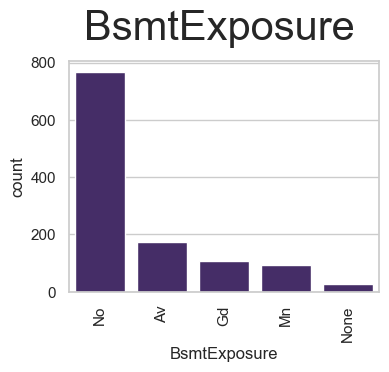

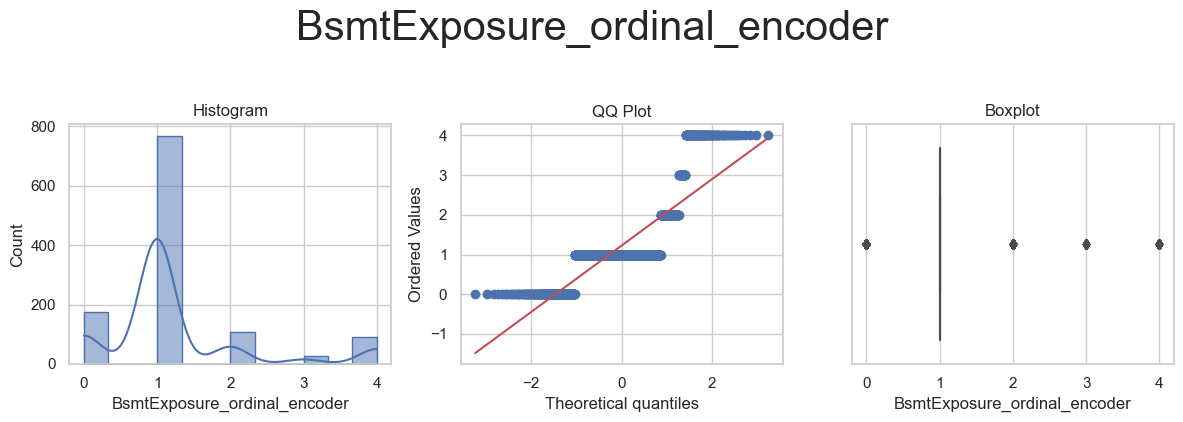



* Variable Analyzed: BsmtFinType1
* Applied transformation: ['BsmtFinType1_ordinal_encoder'] 



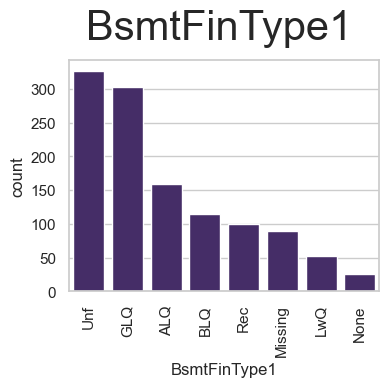

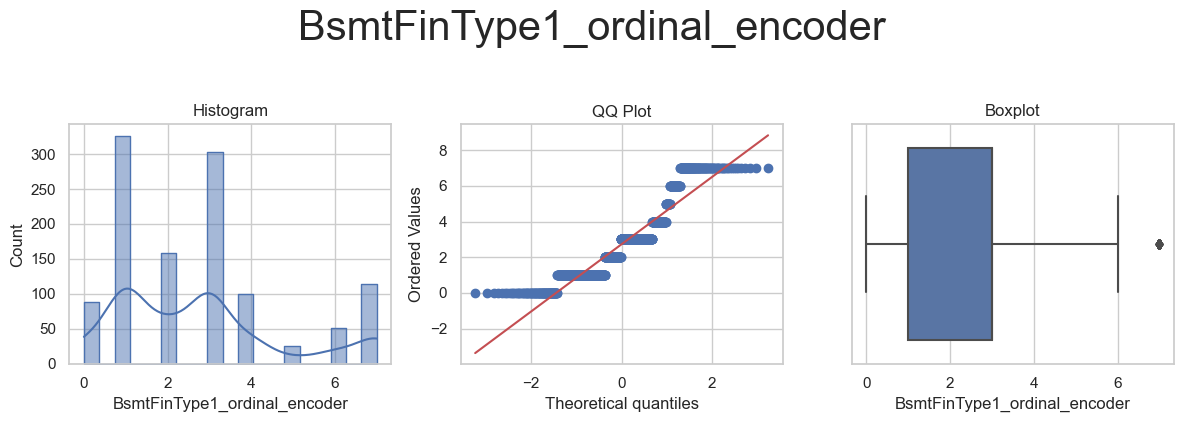



* Variable Analyzed: GarageFinish
* Applied transformation: ['GarageFinish_ordinal_encoder'] 



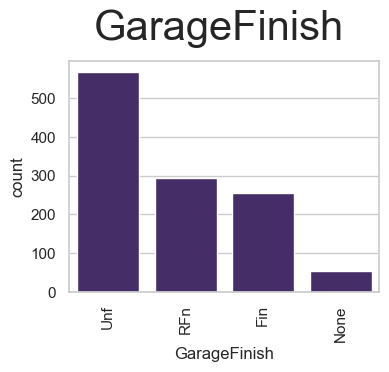

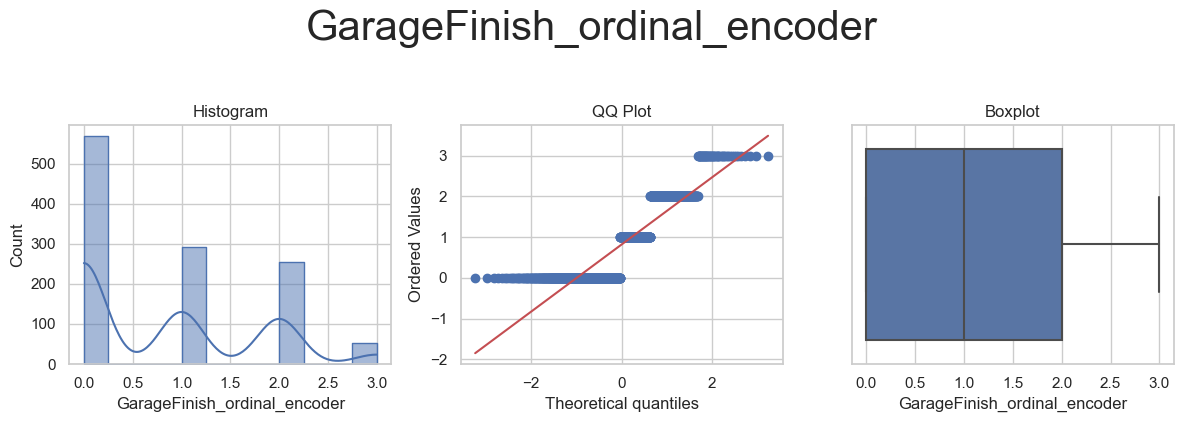



* Variable Analyzed: KitchenQual
* Applied transformation: ['KitchenQual_ordinal_encoder'] 



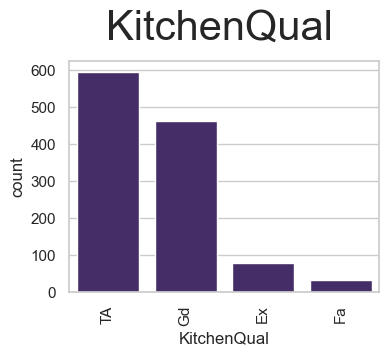

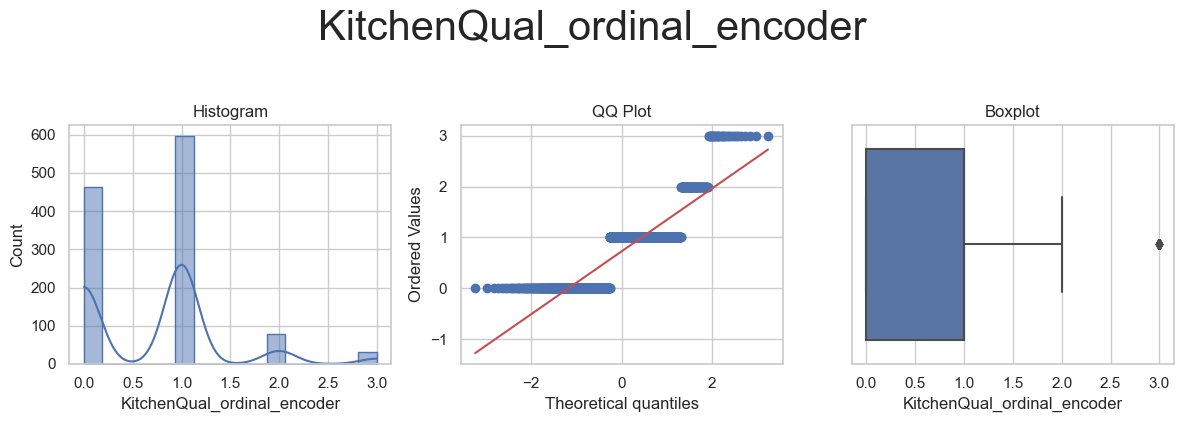

In [39]:
df_engineering = feature_engineering_analysis(df=df_engineering, analysis_type='ordinal_encoder')

We observe that the ordinal encoding has been effective for all the variables, since the categories have been successfully converted into numbers in all cases. The ordinal encoding will therefore be applied for all of the variables in question, so that the model can process them.

### Step 4: Apply the selected transformation to the Train and Test sets

Note that we fit and transform with the train set, but transform only on the test set. This approach is used in general when feature engineering, in order to avoid biasing the model with information from the test data. The test data is transformed using the parameters computed on the training data. See [this Stack Overflow thread](https://stackoverflow.com/questions/48692500/fit-transform-on-training-data-and-transform-on-test-data) for more information.

In [40]:
encoder = OrdinalEncoder(encoding_method='arbitrary', variables = variables_engineering)
TrainSet = encoder.fit_transform(TrainSet)
TestSet = encoder.transform(TestSet)

print("* Categorical encoding - ordinal transformation done!")

* Categorical encoding - ordinal transformation done!


## Numerical Transformation

Numerical transformations improve model performance by making the data more amenable to the algorithms being used. Here we are looking to improve the distribution of the data so that it is closer to a normal distribution, since ML models are generally able to perform more effectively when the numerical data they receive are normally distributed.

### Step 1: Select the variables

In [41]:
numerical_engineering = ['1stFlrSF','2ndFlrSF','GrLivArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF',
                        'GarageArea','LotArea','LotFrontage','OpenPorchSF','MasVnrArea']
numerical_engineering

['1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageArea',
 'LotArea',
 'LotFrontage',
 'OpenPorchSF',
 'MasVnrArea']

### Step 2: Create a separate dataframe with these variables

In [42]:
df_engineering = TrainSet[numerical_engineering].copy()
df_engineering.head()

1stFlrSF  2ndFlrSF  GrLivArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0      1828       0.0       1828          48       1774         1822   
1       894       0.0        894           0        894          894   
2       964       0.0        964         713        163          876   
3      1689       0.0       1689        1218        350         1568   
4      1541       0.0       1541           0       1541         1541   

   GarageArea  LotArea  LotFrontage  OpenPorchSF  MasVnrArea  
0         774    11694         90.0          108       452.0  
1         308     6600         60.0            0         0.0  
2         432    13360         80.0            0         0.0  
3         857    13265         69.0           59       148.0  
4         843    13704        118.0           81       150.0

### Step 3: Apply the `feature_engineering_analysis` function to transform the variables into engineered variables

* Variable Analyzed: 1stFlrSF
* Applied transformation: ['1stFlrSF_log_e', '1stFlrSF_log_10', '1stFlrSF_reciprocal', '1stFlrSF_power', '1stFlrSF_box_cox', '1stFlrSF_yeo_johnson'] 



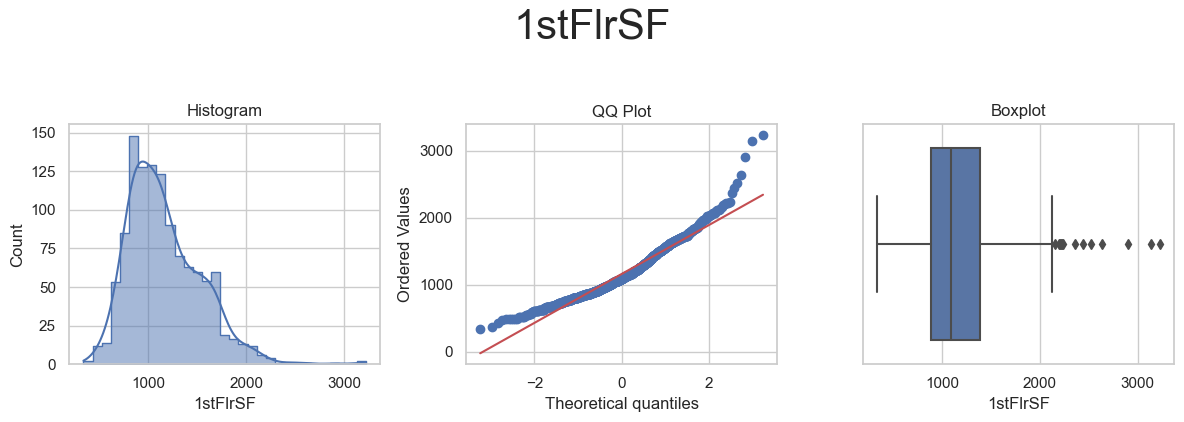

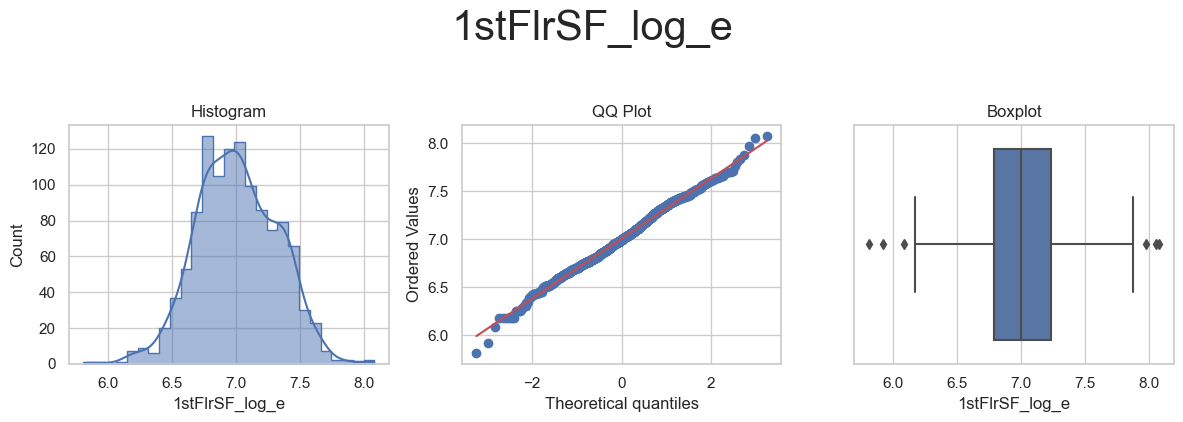

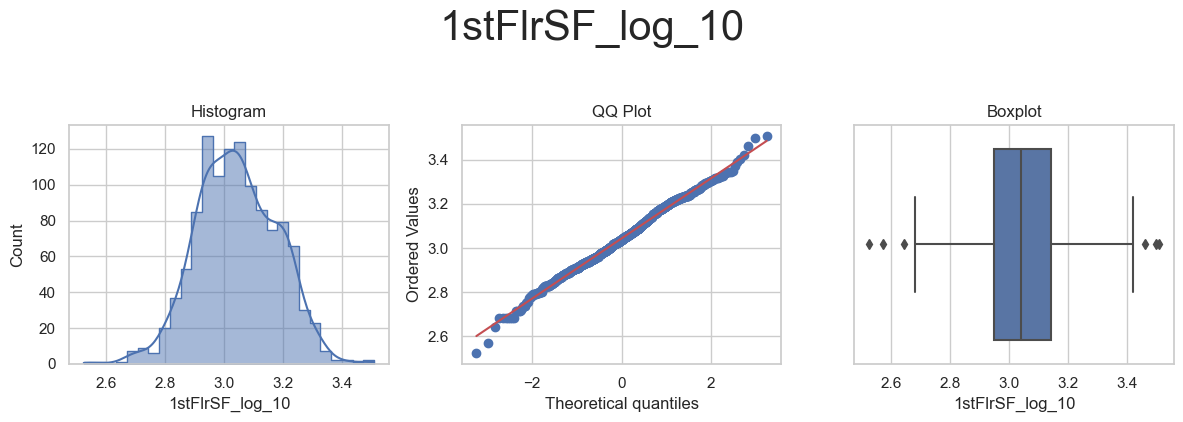

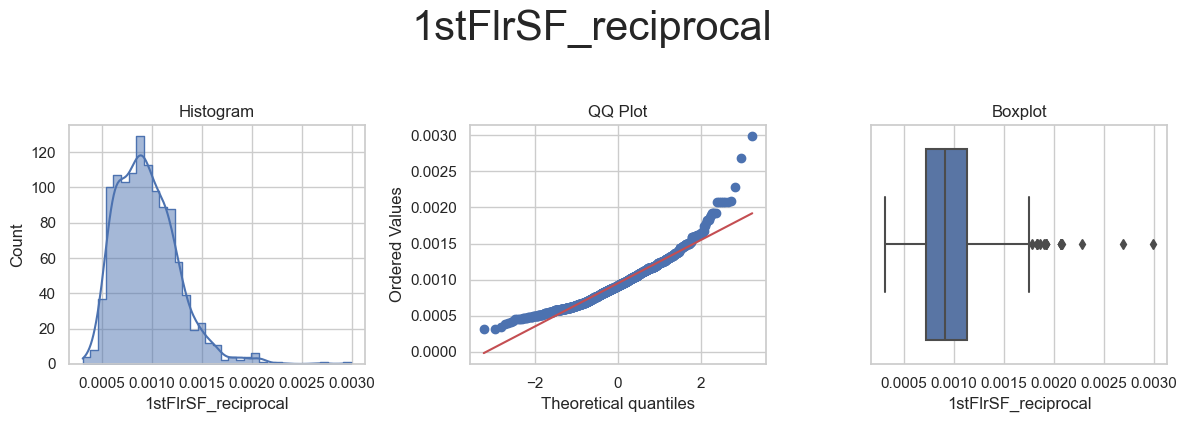

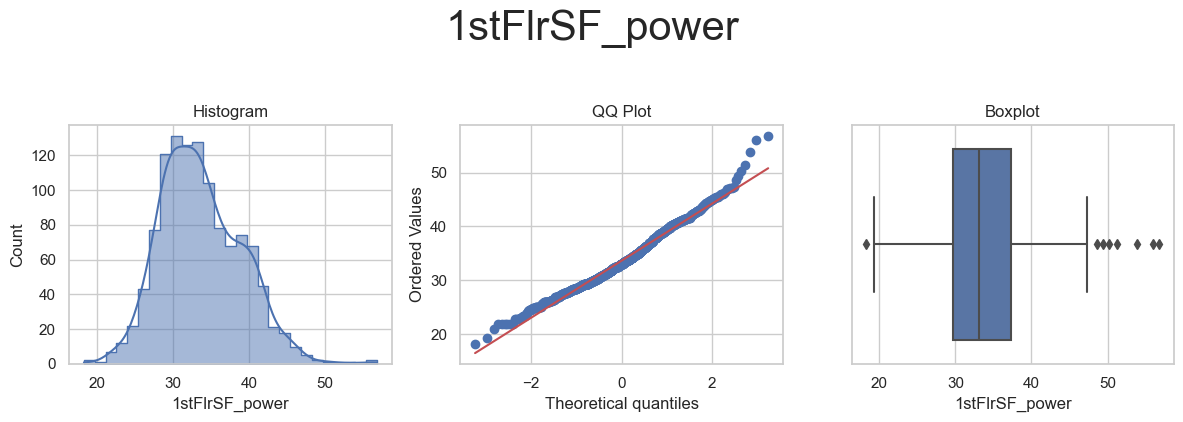

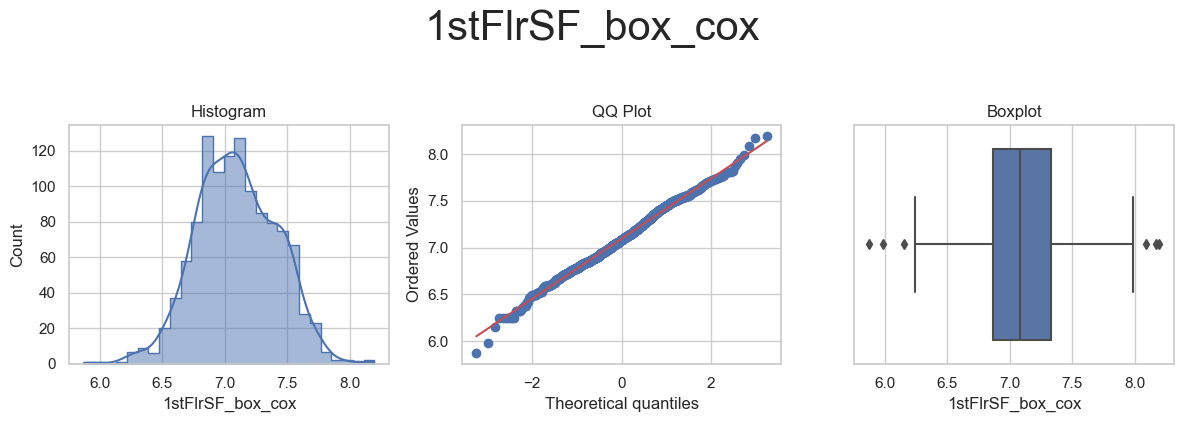

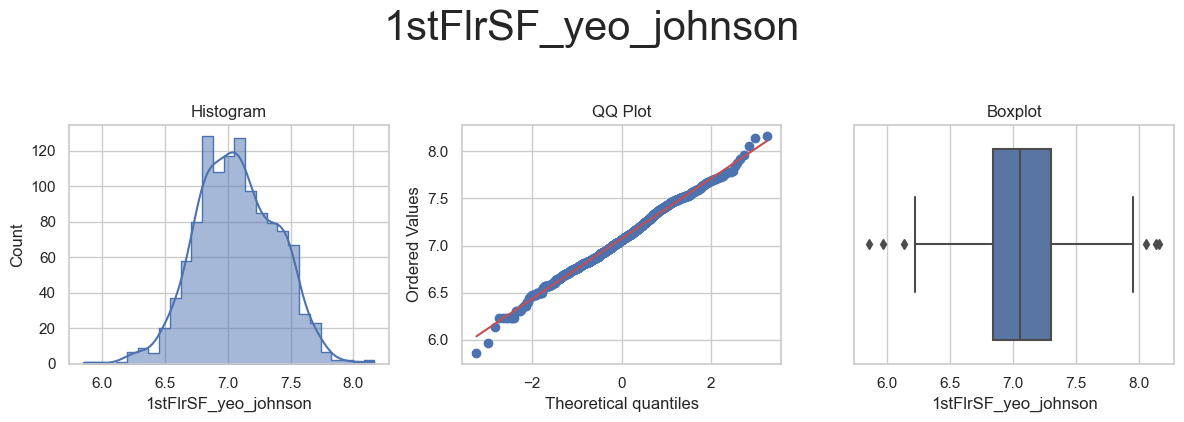



* Variable Analyzed: 2ndFlrSF
* Applied transformation: ['2ndFlrSF_power', '2ndFlrSF_yeo_johnson'] 



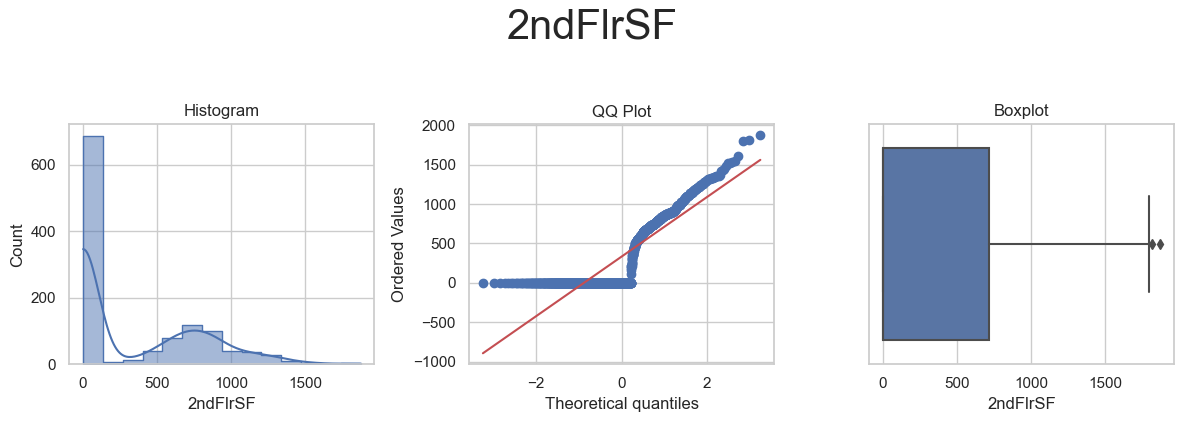

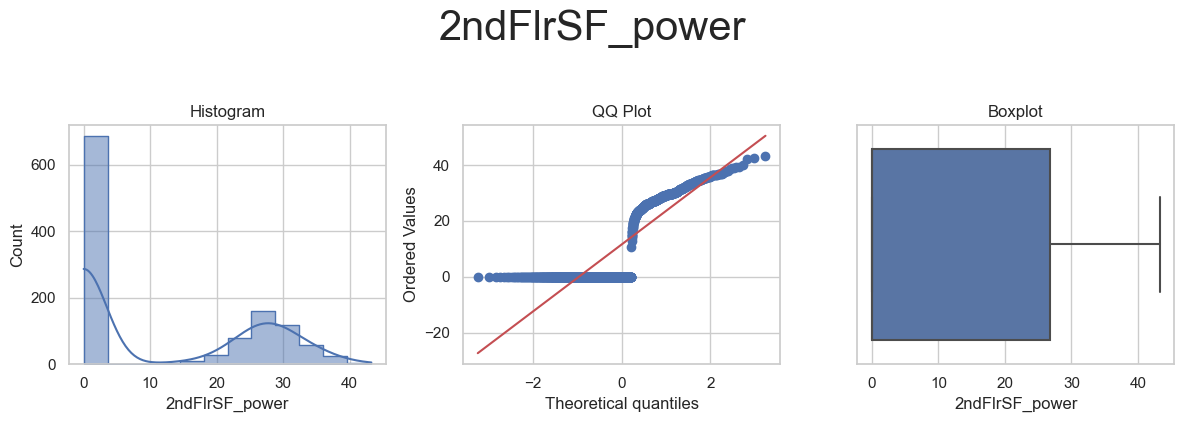

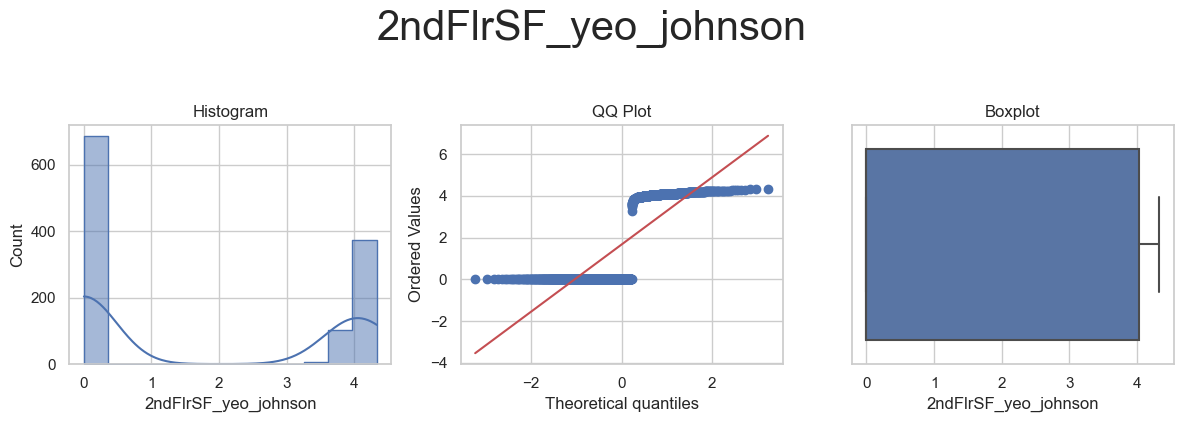



* Variable Analyzed: GrLivArea
* Applied transformation: ['GrLivArea_log_e', 'GrLivArea_log_10', 'GrLivArea_reciprocal', 'GrLivArea_power', 'GrLivArea_box_cox', 'GrLivArea_yeo_johnson'] 



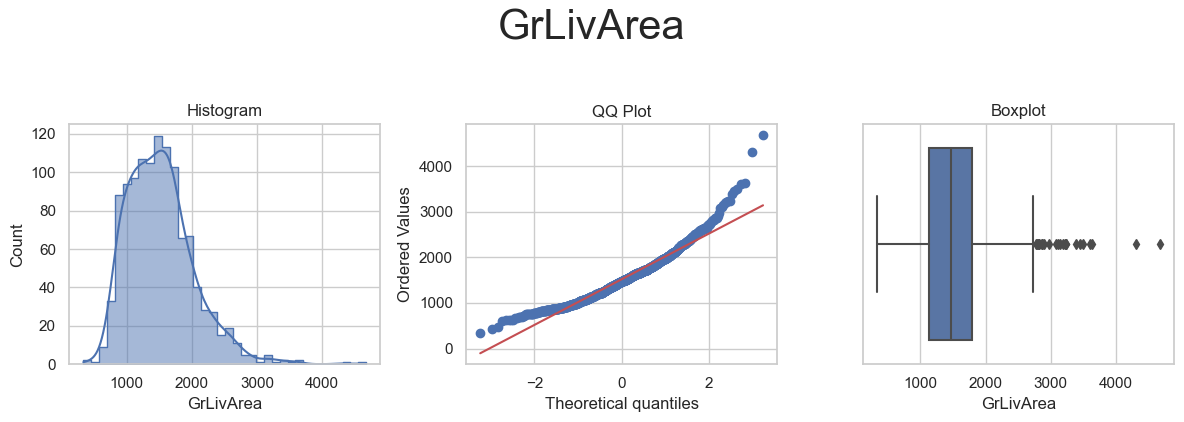

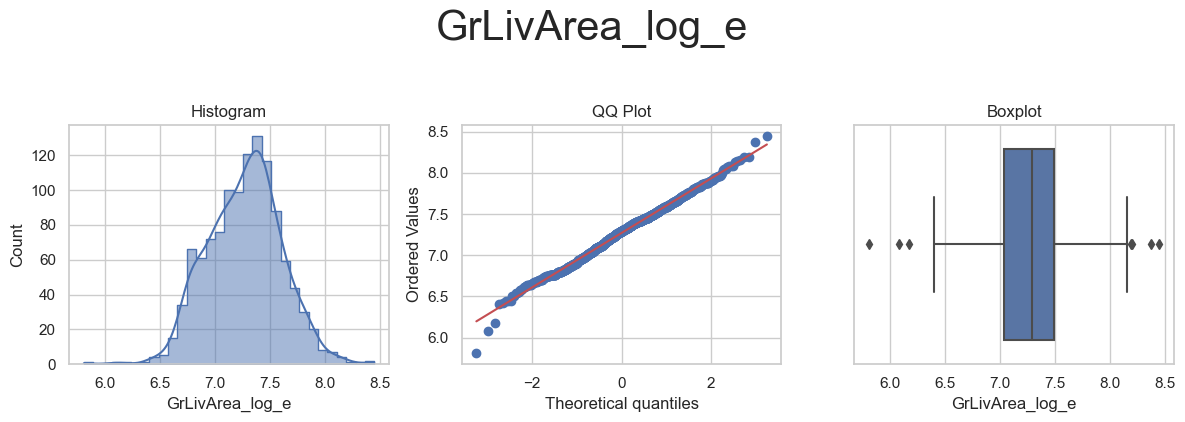

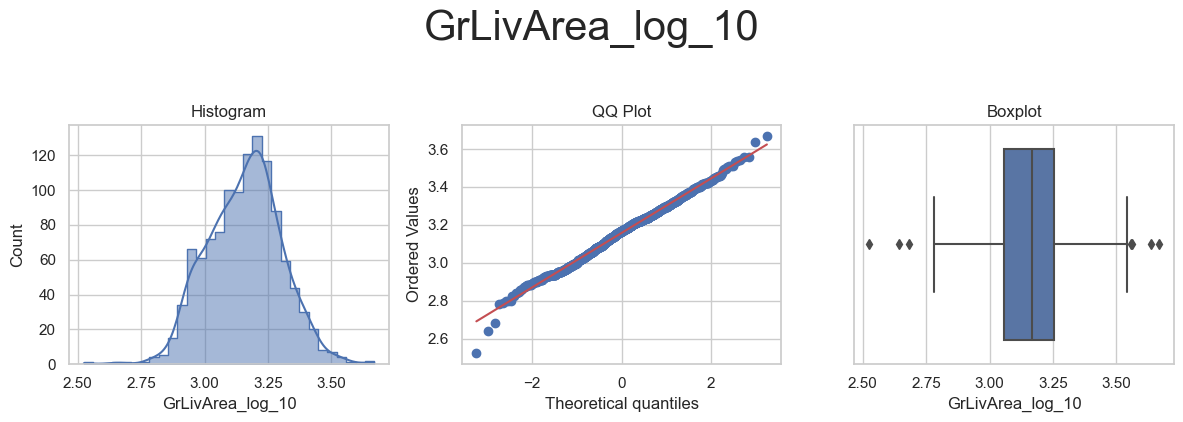

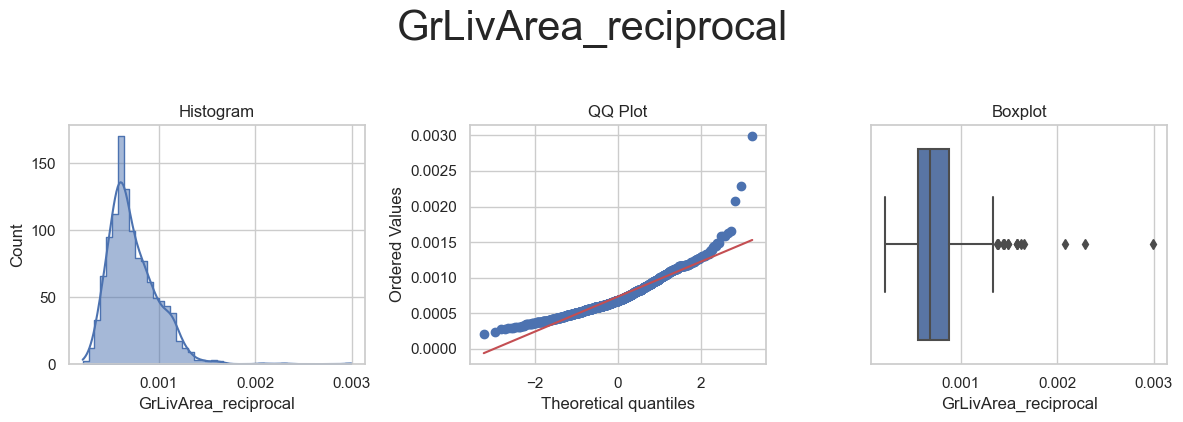

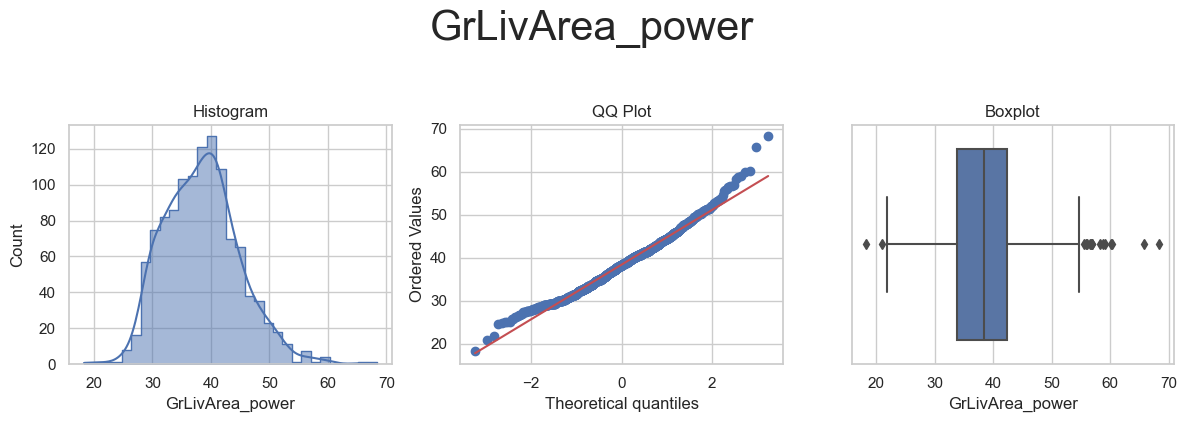

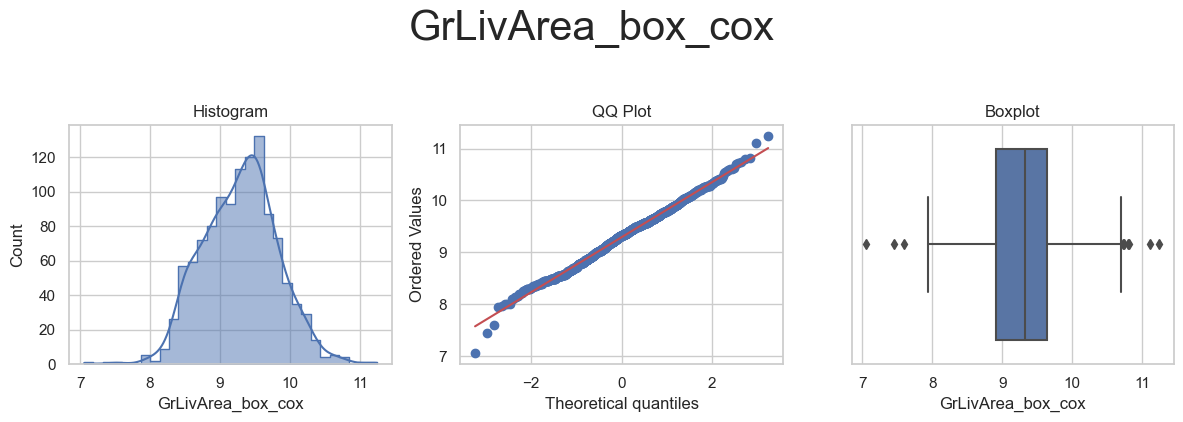

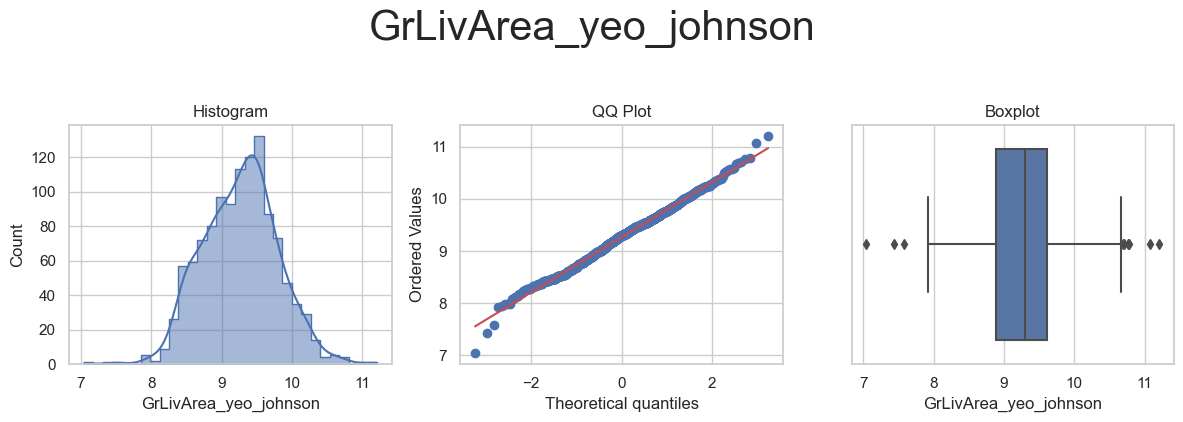



* Variable Analyzed: BsmtFinSF1
* Applied transformation: ['BsmtFinSF1_power', 'BsmtFinSF1_yeo_johnson'] 



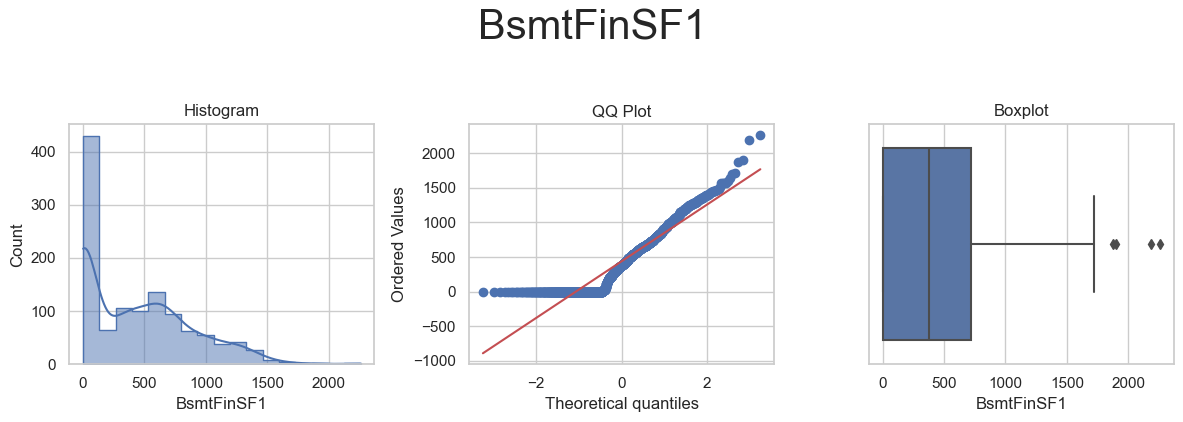

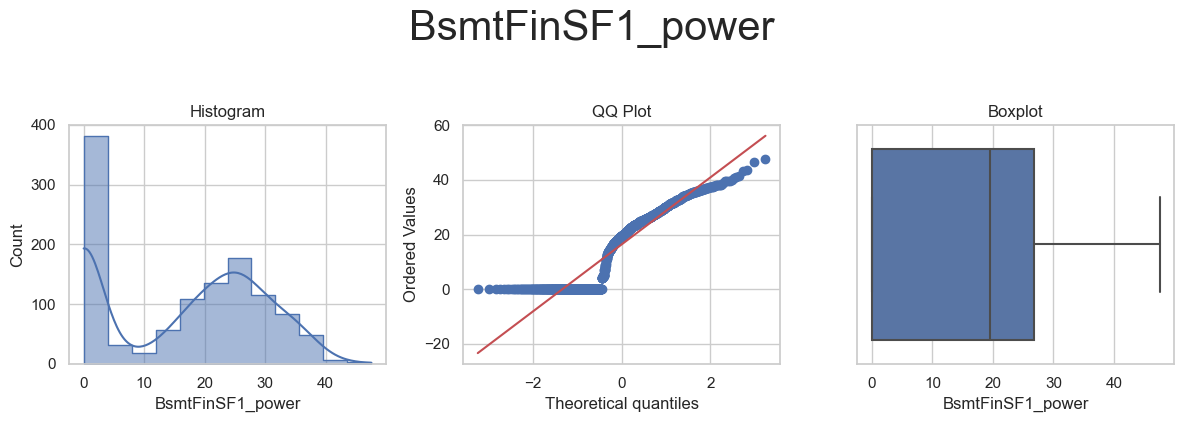

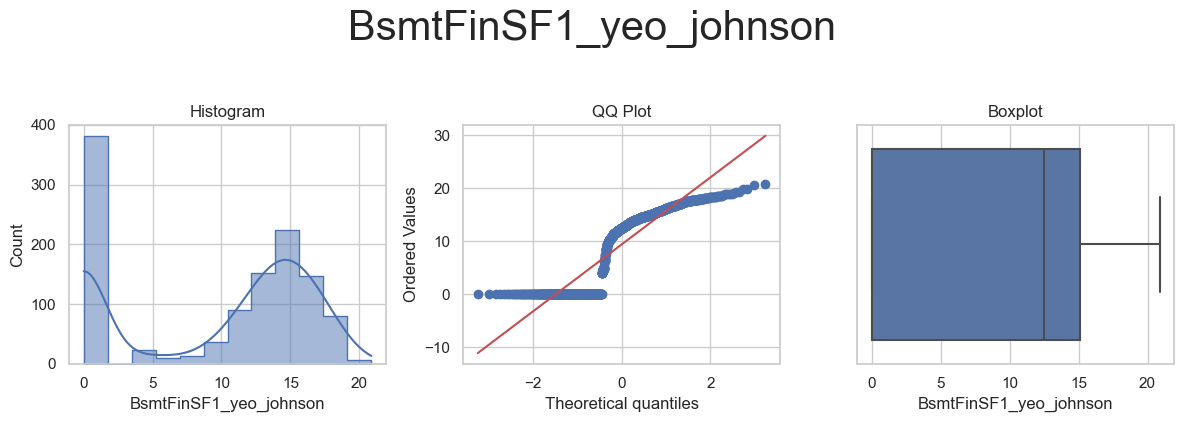



* Variable Analyzed: BsmtUnfSF
* Applied transformation: ['BsmtUnfSF_power', 'BsmtUnfSF_yeo_johnson'] 



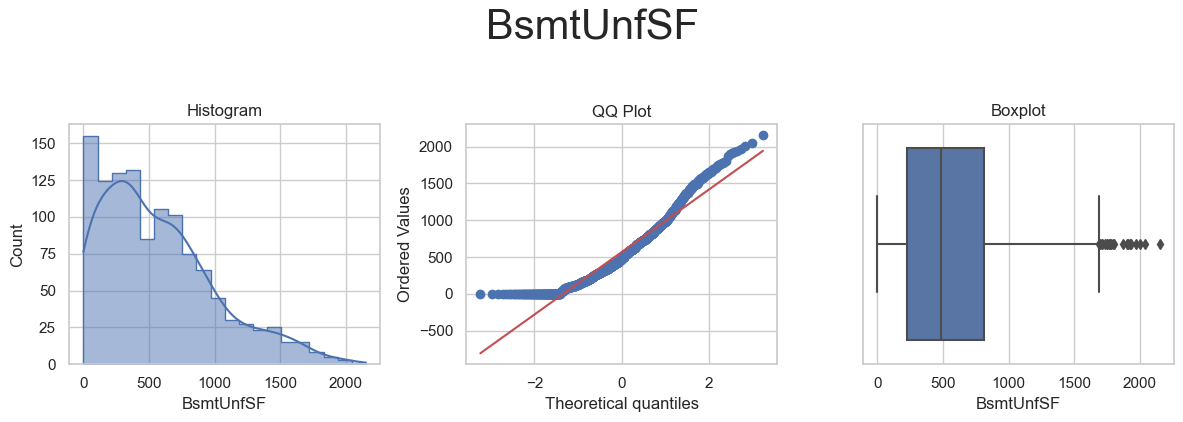

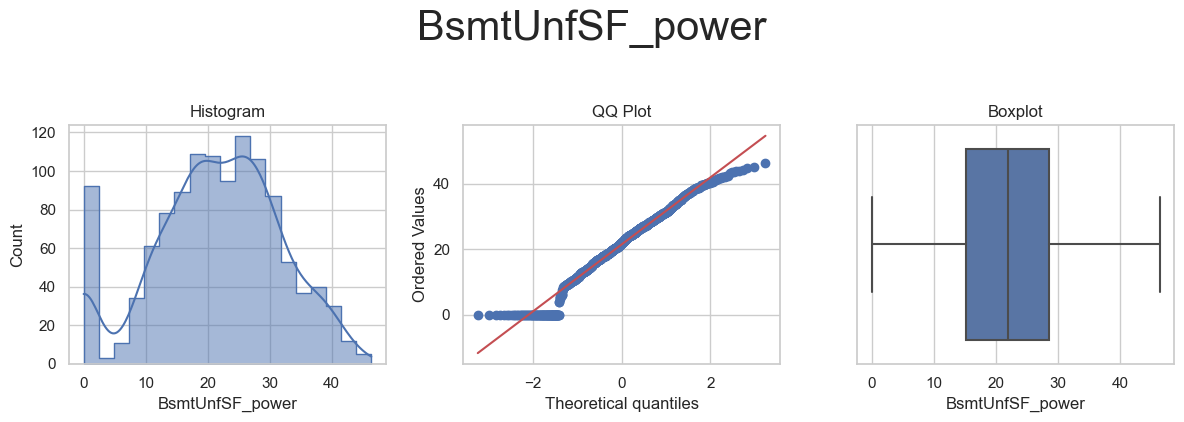

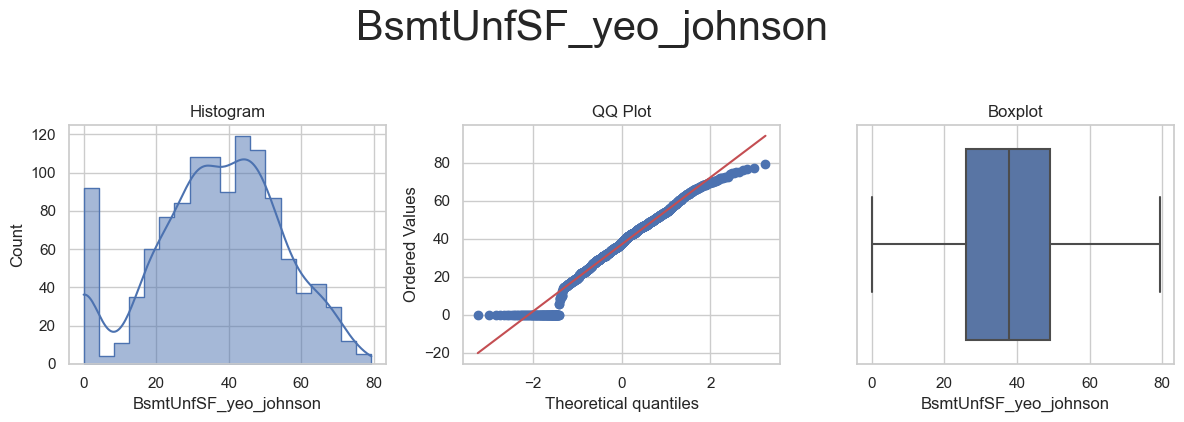



* Variable Analyzed: TotalBsmtSF
* Applied transformation: ['TotalBsmtSF_power', 'TotalBsmtSF_yeo_johnson'] 



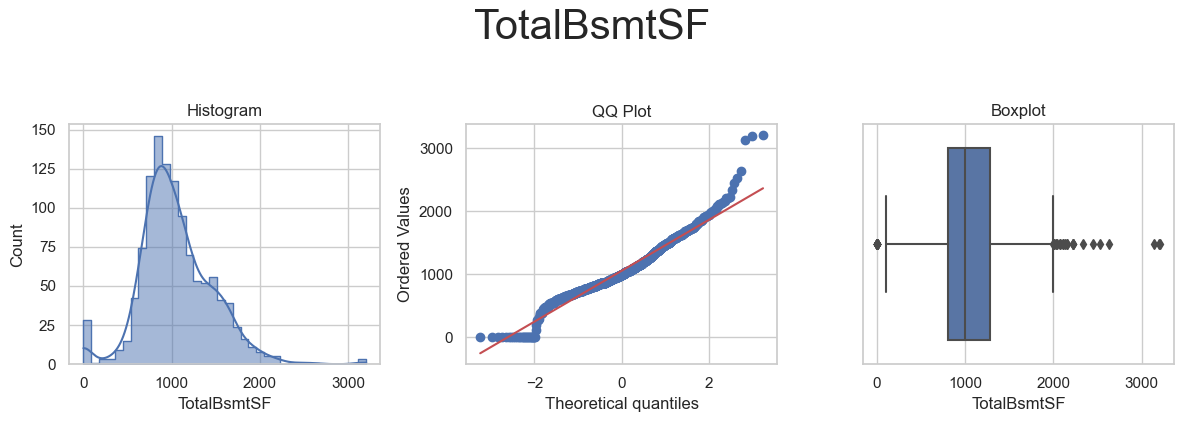

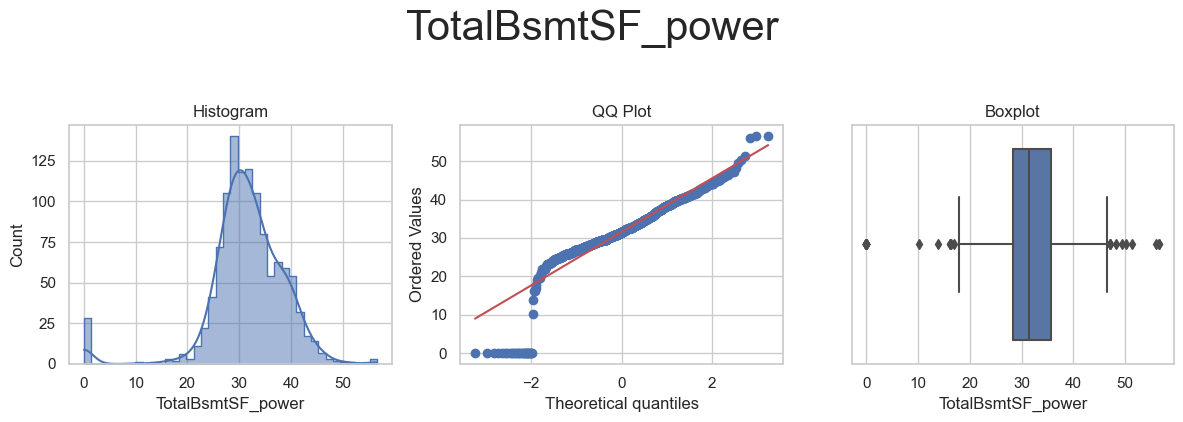

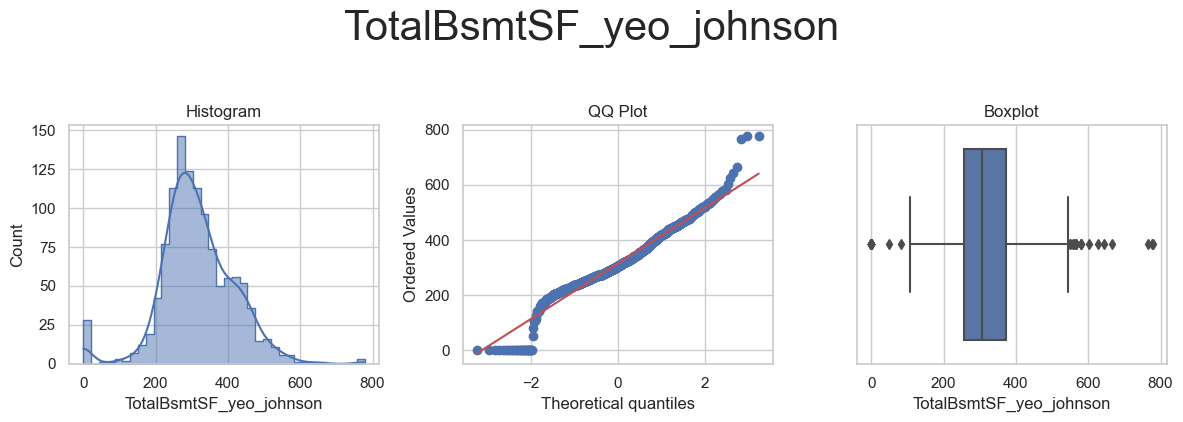



* Variable Analyzed: GarageArea
* Applied transformation: ['GarageArea_power', 'GarageArea_yeo_johnson'] 



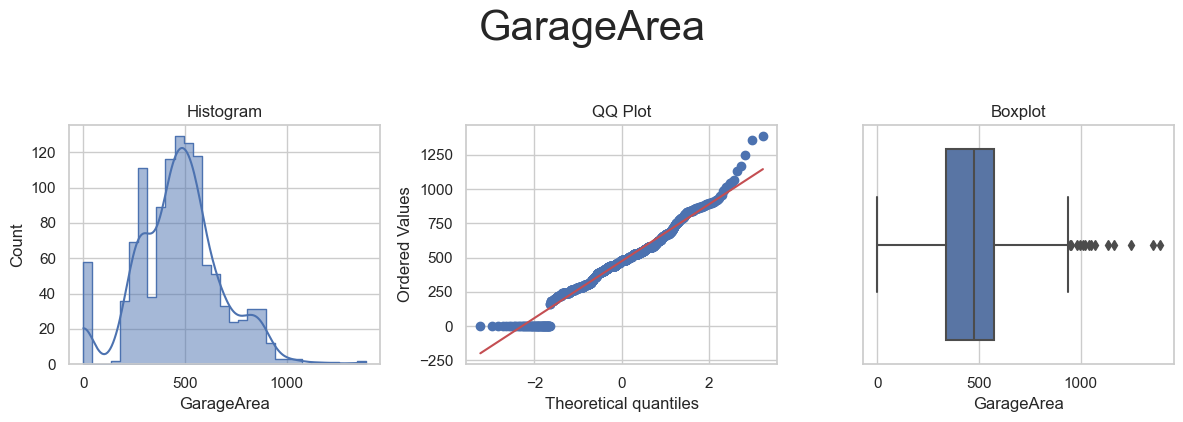

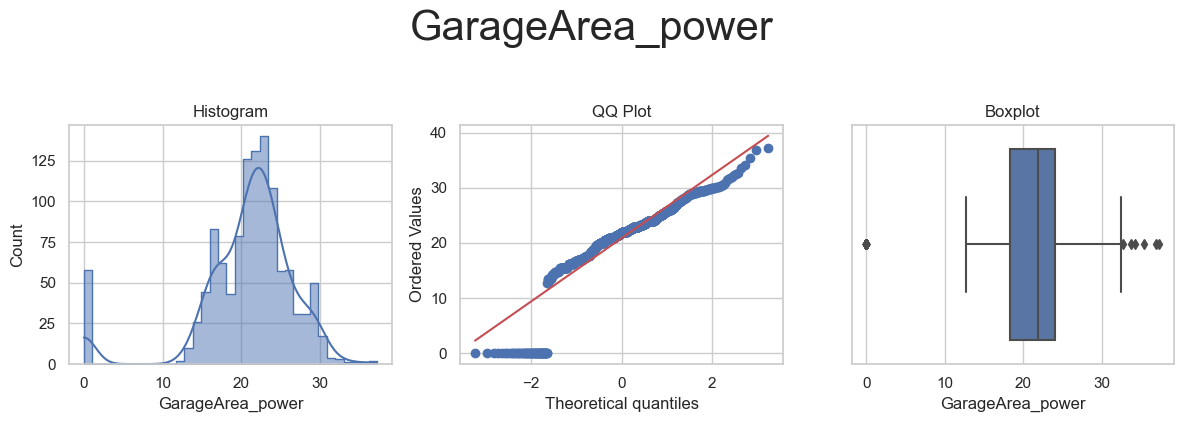

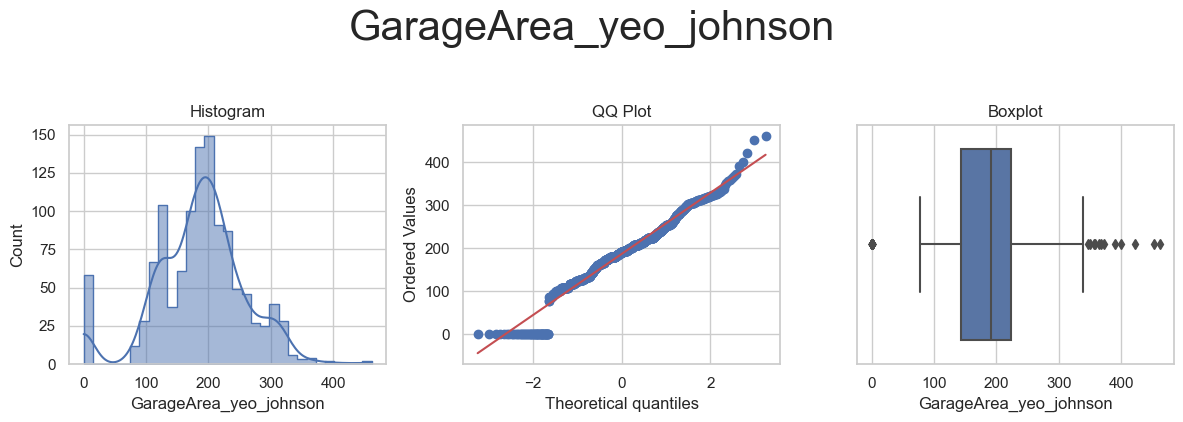



* Variable Analyzed: LotArea
* Applied transformation: ['LotArea_log_e', 'LotArea_log_10', 'LotArea_reciprocal', 'LotArea_power', 'LotArea_box_cox', 'LotArea_yeo_johnson'] 



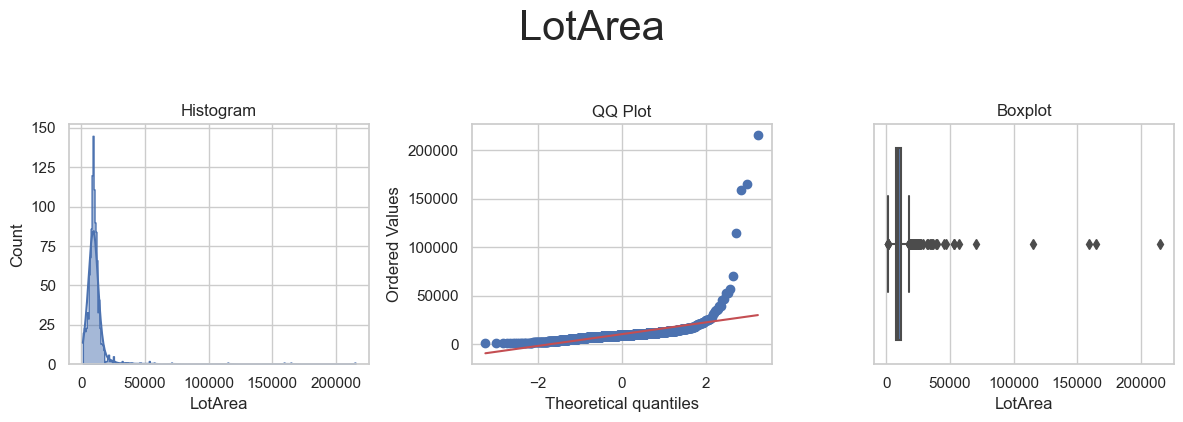

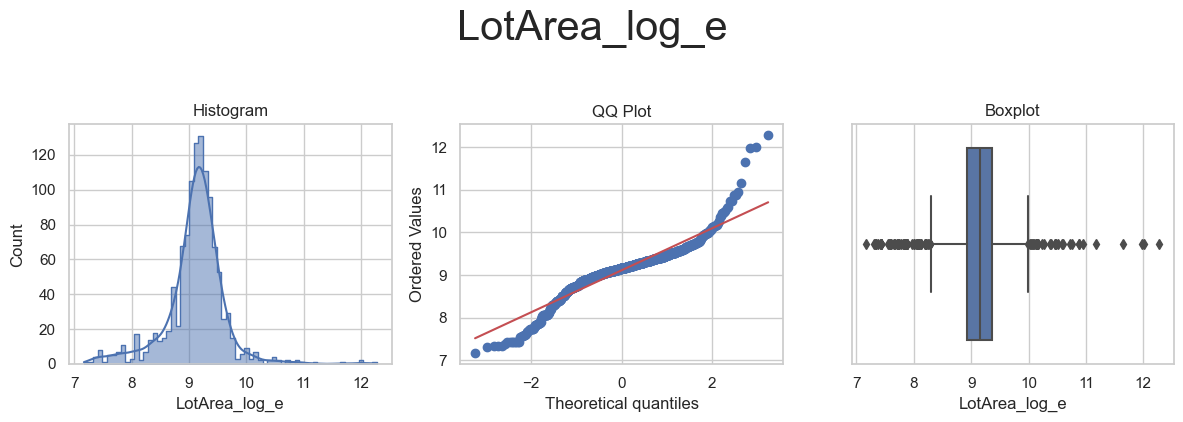

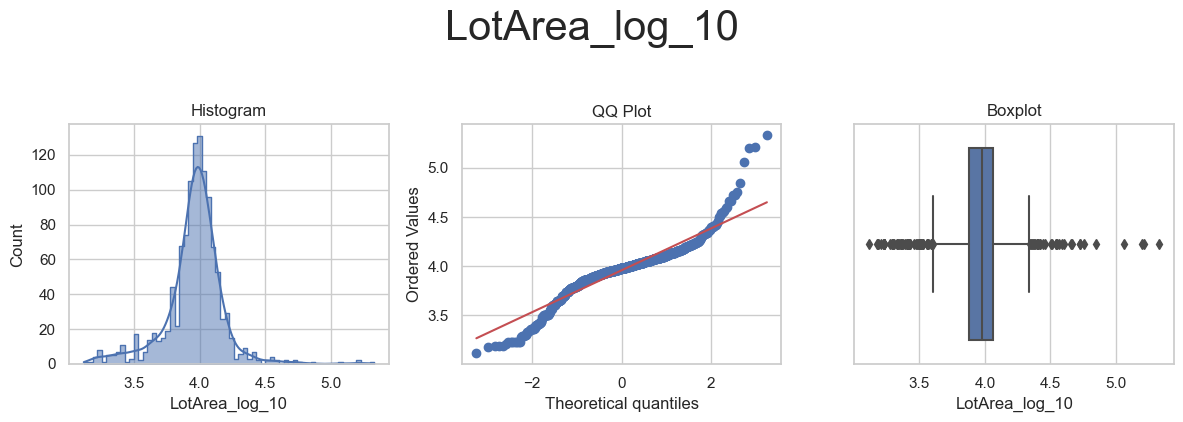

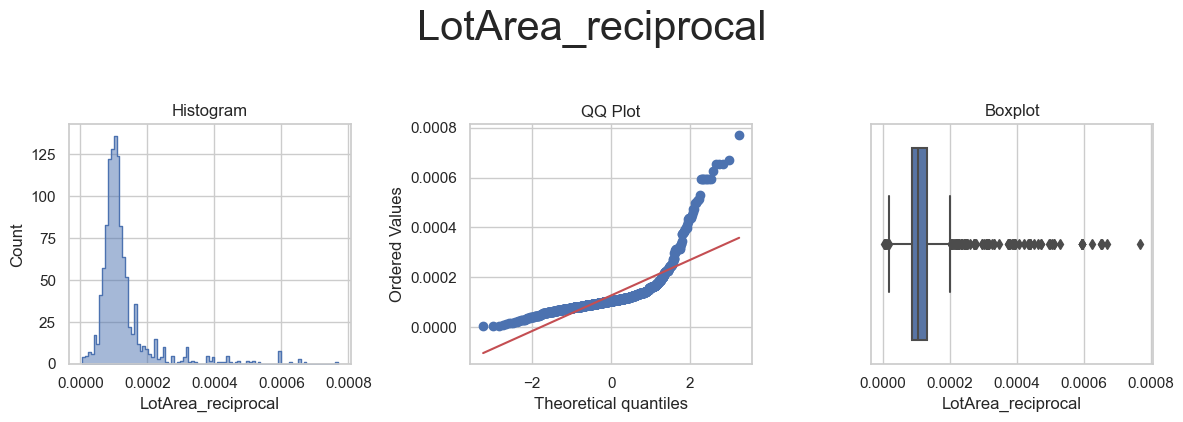

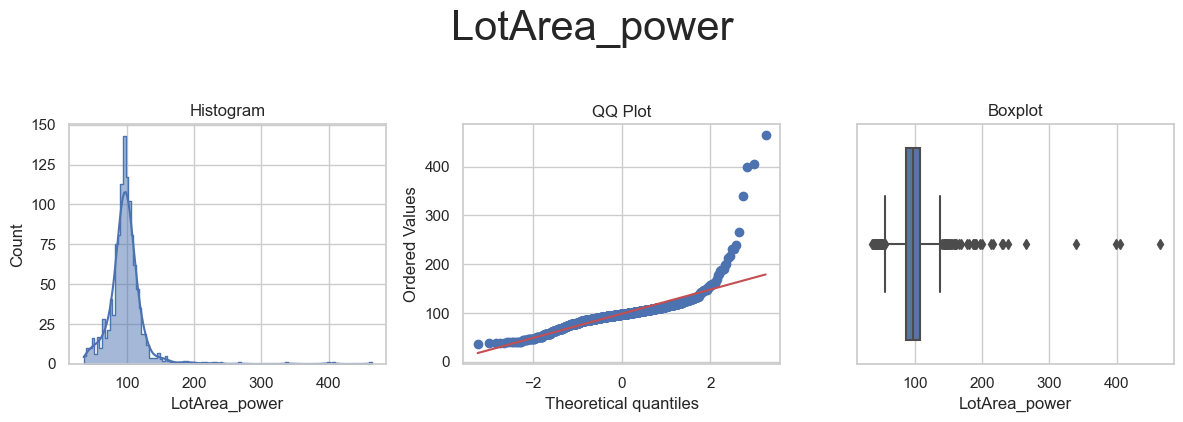

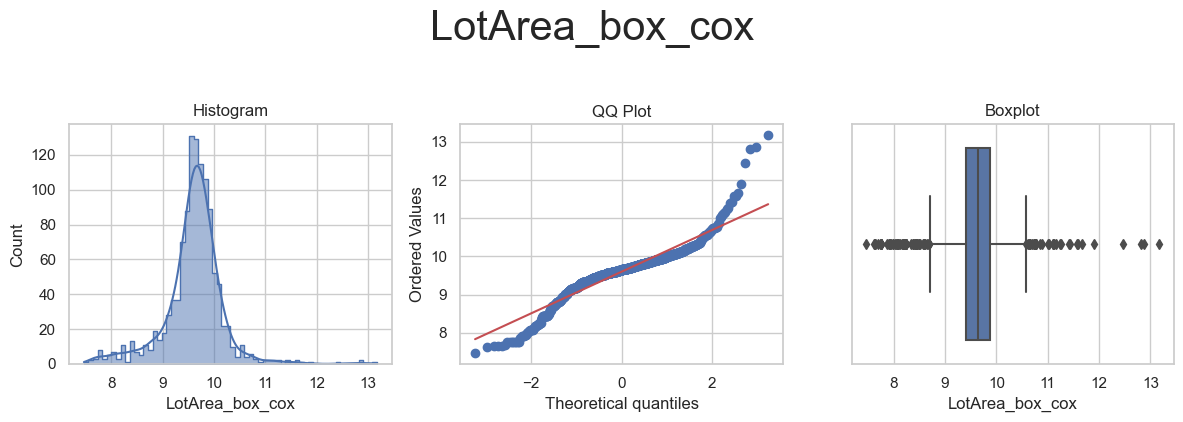

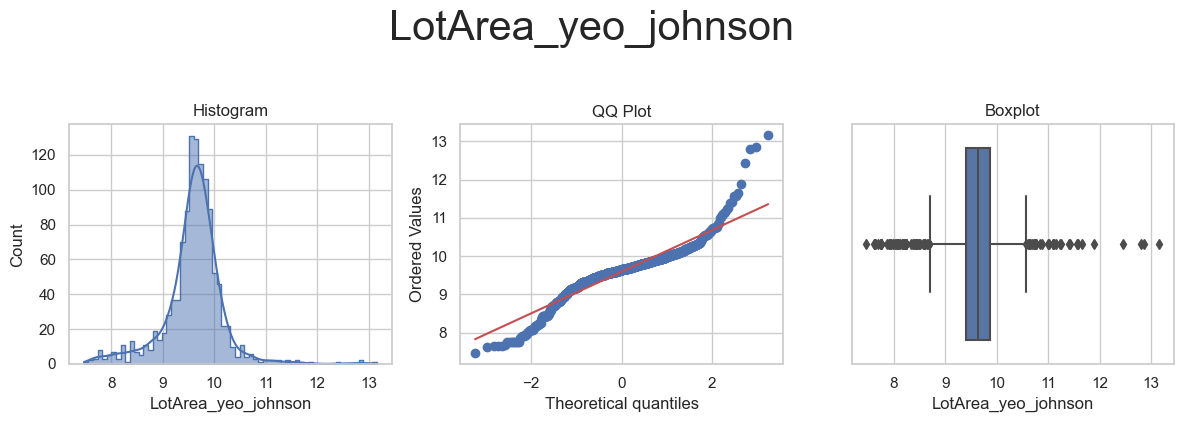



* Variable Analyzed: LotFrontage
* Applied transformation: ['LotFrontage_log_e', 'LotFrontage_log_10', 'LotFrontage_reciprocal', 'LotFrontage_power', 'LotFrontage_box_cox', 'LotFrontage_yeo_johnson'] 



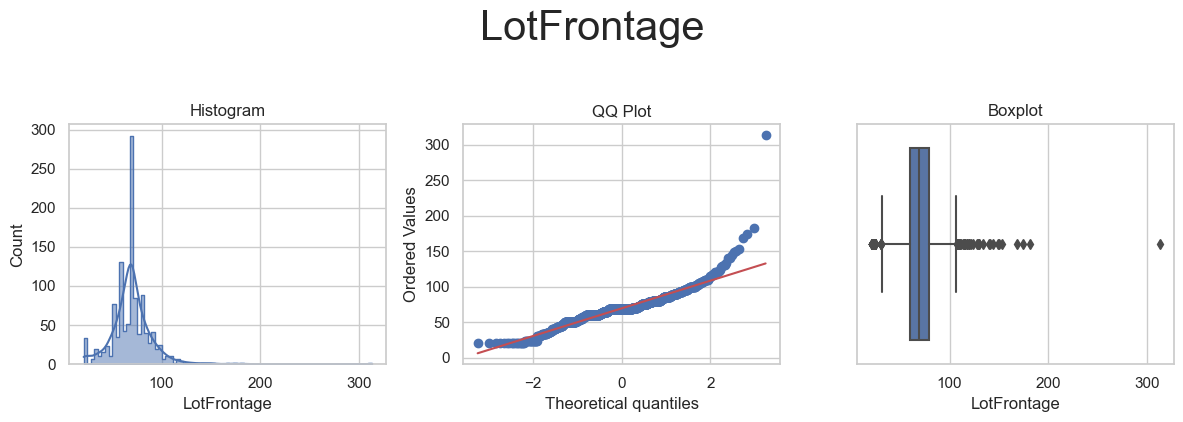

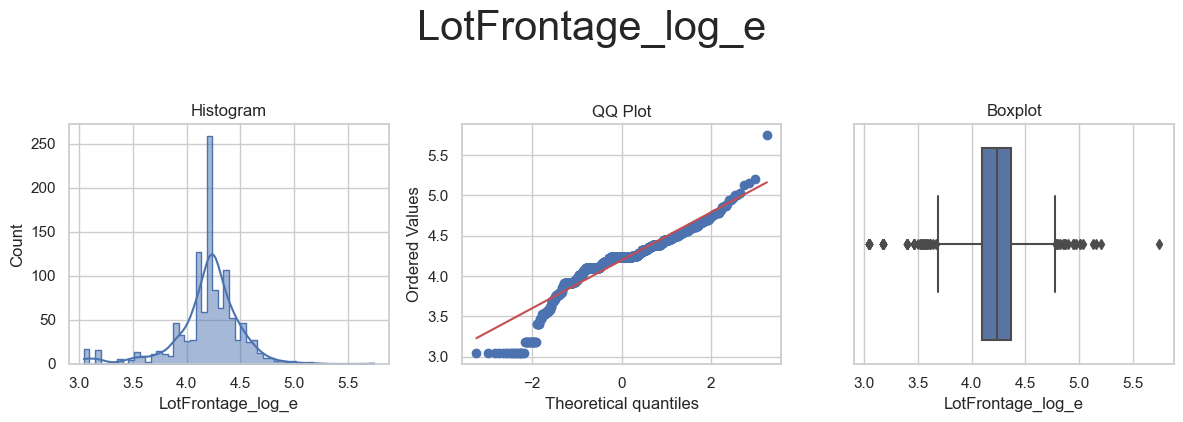

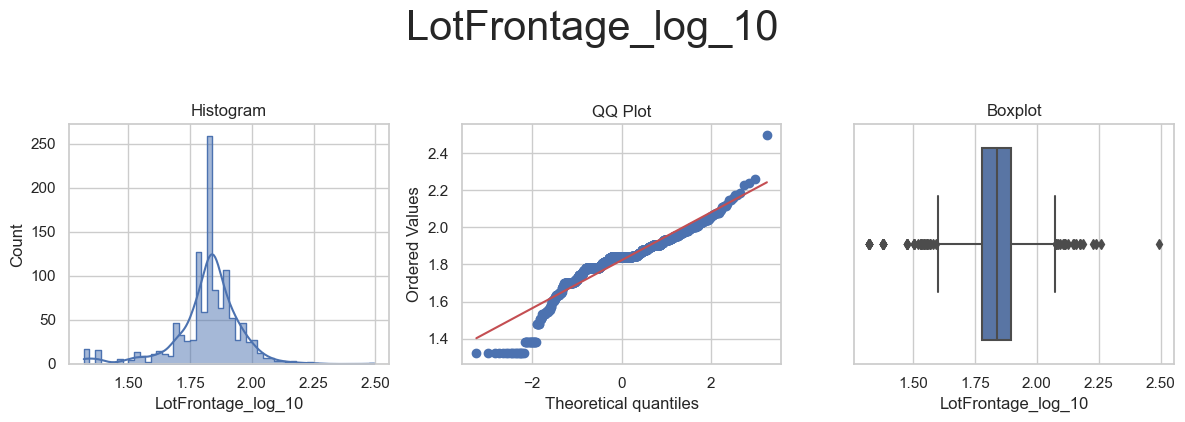

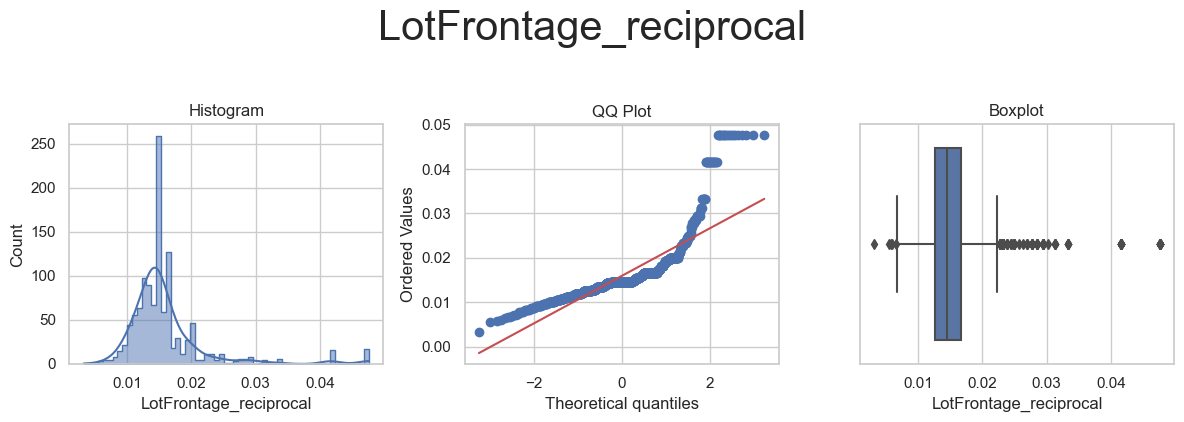

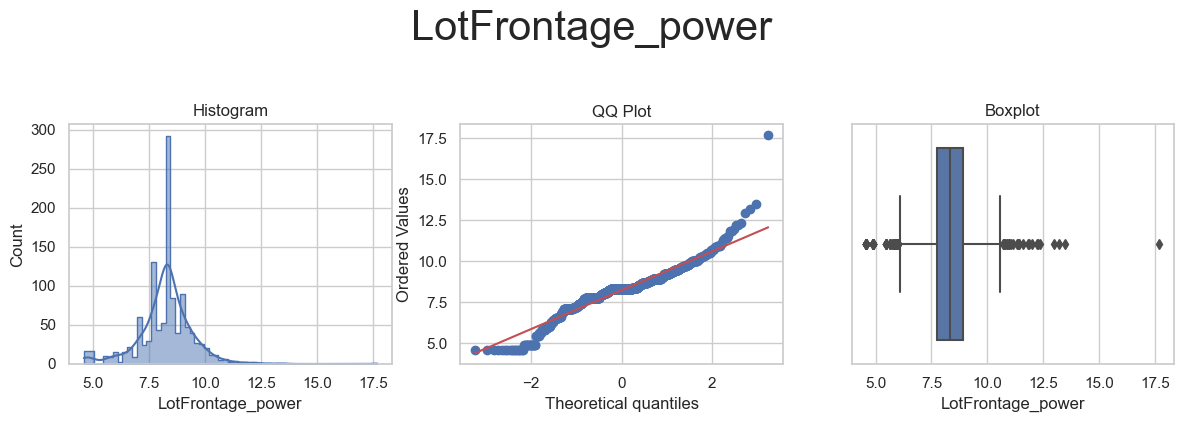

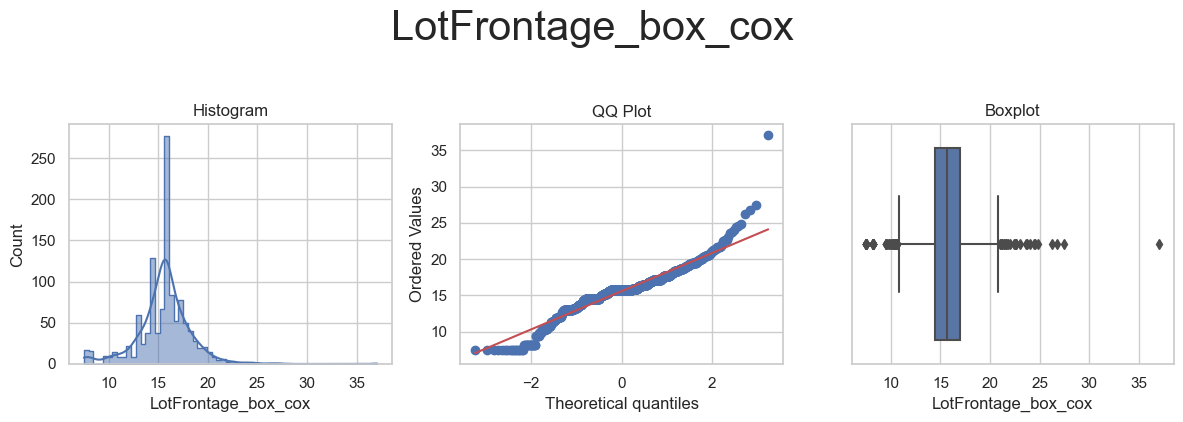

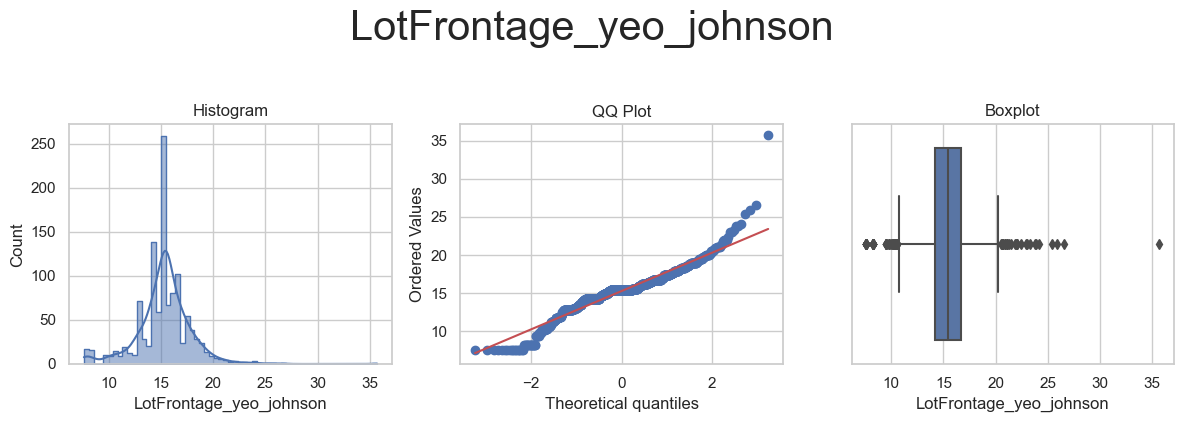



* Variable Analyzed: OpenPorchSF
* Applied transformation: ['OpenPorchSF_power', 'OpenPorchSF_yeo_johnson'] 



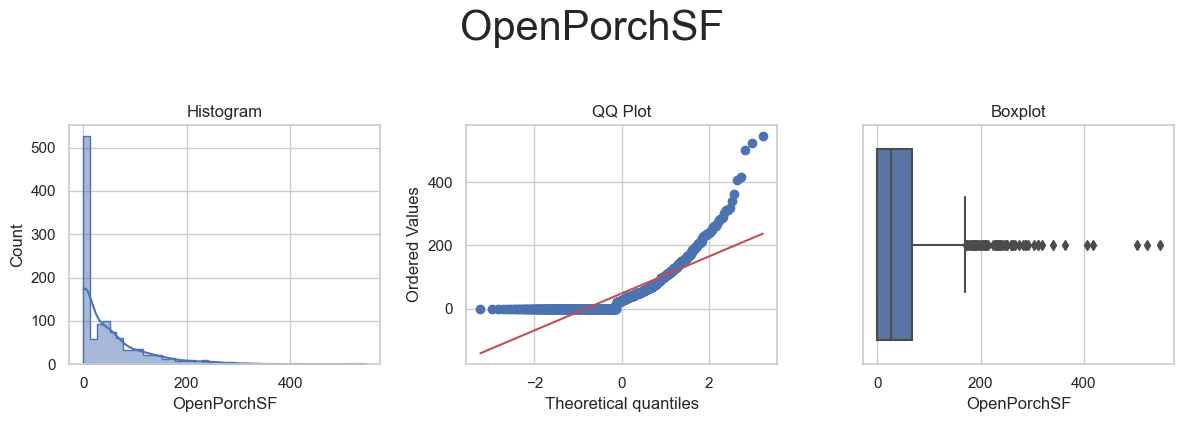

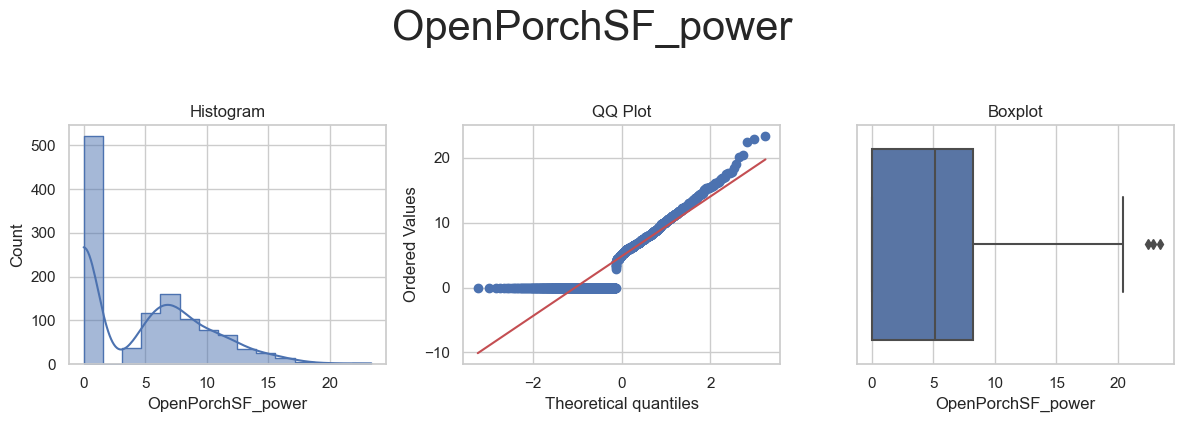

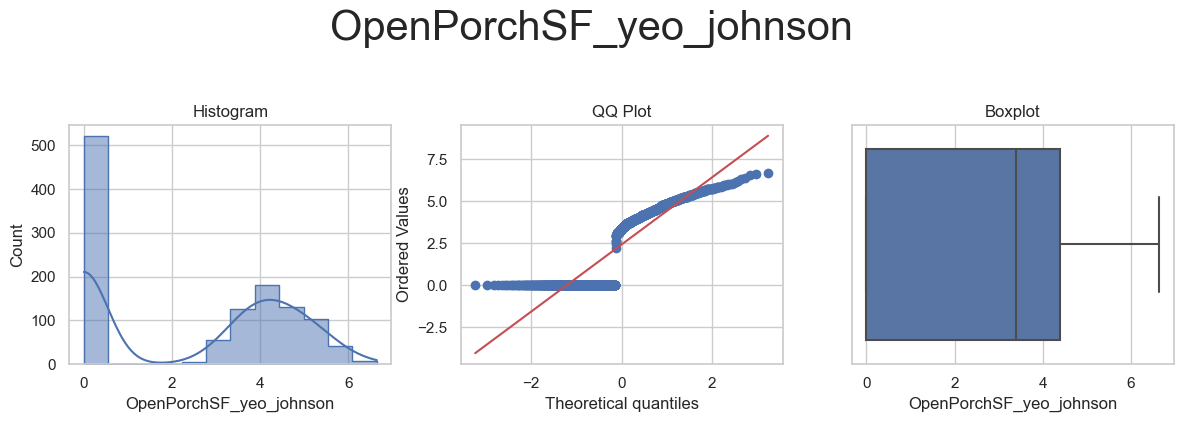



* Variable Analyzed: MasVnrArea
* Applied transformation: ['MasVnrArea_power', 'MasVnrArea_yeo_johnson'] 



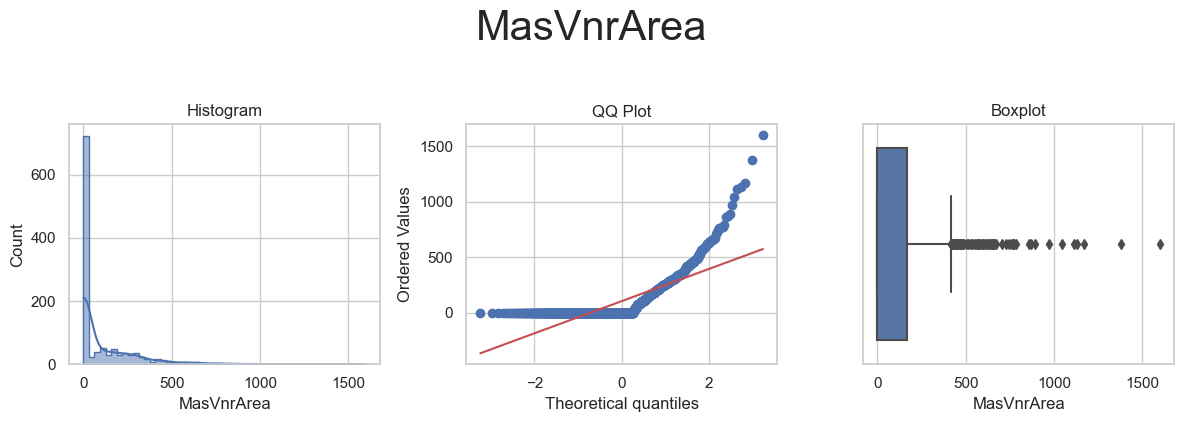

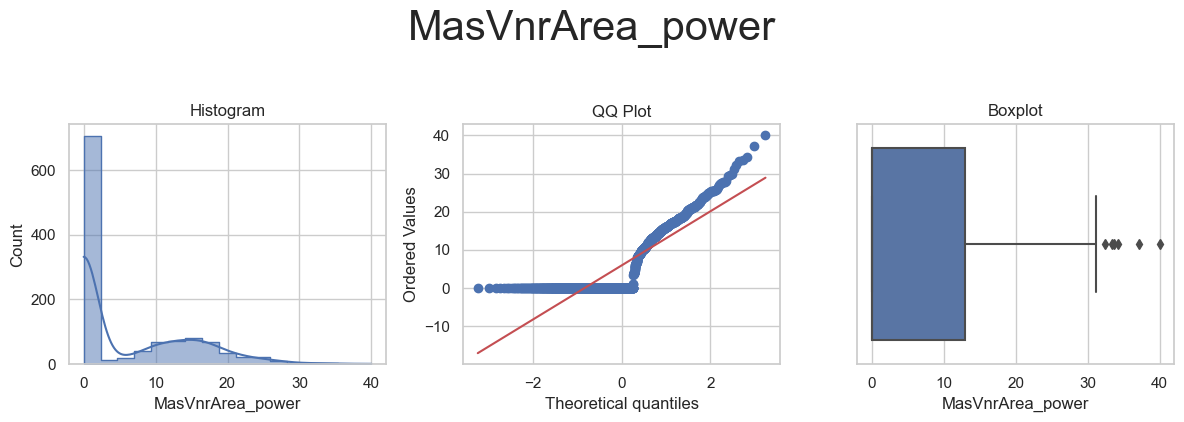

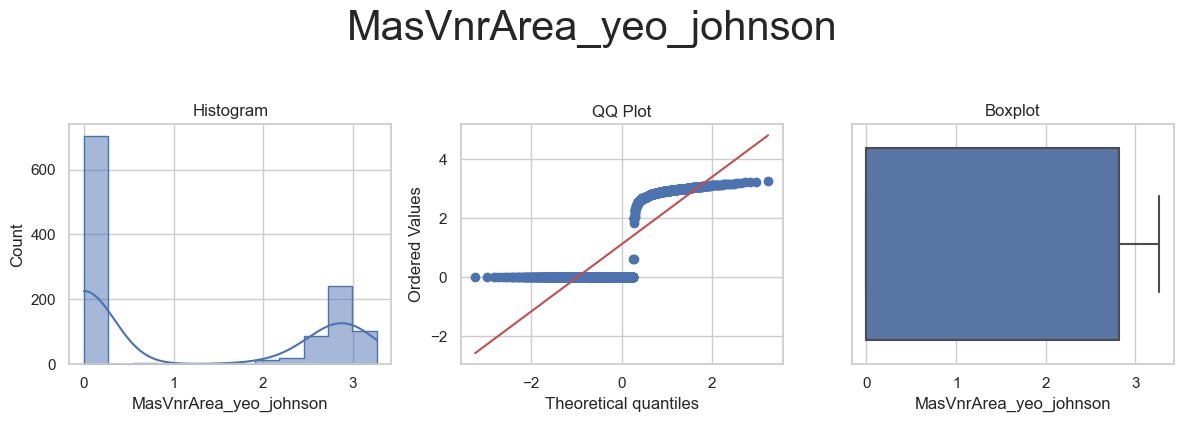

In [43]:
df_engineering = feature_engineering_analysis(df=df_engineering, analysis_type='numerical')

Considering the transformations above, we note that:

* We are looking for transformations that move the distribution of the variables closer to a normal distribution. In practical terms, when we are inspecting the graphs, this means that for a transformation that performs well, relative to the original:
    - The histograms might show a less skewed, more symmetrical distribution that exhibits the distinctive "bell curve" shape of the normal distribution, and / or lower kurtosis.
    - The QQ plots might show (blue) dots that more closely follow the straight (red) line y = x.
    - The box plots might show a median closer to the centre of the box, and the whiskers might be closer to the same length as one another, with fewer outliers shown on the plot as a whole.
<br/><br/>

* Log transformations cannot handle zero or negative variables, so only a subset of the variables have been transformed.
    - Where they are possible, log transformations generally help to transform a skewed distribution to make it closer to a normal distribution.
    - This is seen in, for example, the log transforms of `1stFlrSF` and `GrLivArea`: the histograms of the variables prior to transformation show significant positive skew, whereas the histograms of the variables after log transformations show distributions that are closer to the normal distribution.
    - Log transformations have been most effective for the following variables. There is little to choose between log in base 10 and log in base e for the majority of variables; in some cases log in base e appears marginally superior, so for simplicity we will use this for all the variables that undergo log transformations: `1stFlrSF`, `GrLivArea`, `LotArea` and `LotFrontage`.
<br/><br/>

* Reciprocal transformations apply the reciprocal transformation, 1/x, to numerical variables, and as such they cannot process variables that include zero values.
    - Because the reciprocal transformation introduces an inverse relationship between the transformed variable and its original values, whereby larger original values become smaller after the transformation, and vice versa, it can be helpful in normalising a distribution by reducing larger values and increasing smaller values.
    - It can also have a substantial impact on outliers. 
    - Here, reciprocal transformations have been successfully applied to a number of variables.
    - However, they have generally failed to improve the skewness of the distributions, although the kurtosis does look marginally better on some variables after transformation.
    - We note that in all cases where reciprocal transformations have led to improvement, another transformation has done a better job for the variable in question.
<br/><br/>

* The Box-Cox transformer applies to positive data only, and aims to move the distribution of the data closer to a normal distribution. It can help stabilise variance across different levels of the variable, which makes it more suitable for some models.
    - In the current dataset, the Box-Cox transformer has yielded a modest improvement to some variables vs the original, for example `LotFrontage`.
    - Again, however, it has never been the best-performing transformation for any of our variables in terms of moving its distribution as close as possible to a normal distribution, and therefore will not be used on our model data.
<br/><br/>

* The Yeo-Johnson transformation is a more generalised version of the Box-Cox transformation, allowing for the transformation of variables with positive, zero, and negative values. It can handle a wide range of data distributions, making it a versatile option, and can also help stabilise variance.
    - Here we see that it performs best for a number of variables in terms of transforming their distribution to one that more closely resembles a normal distribution. It will be used here on these variables: `BsmtUnfSF`, `GarageArea` and `OpenPorchSF`.
<br/><br/>

* The Power transformer applies power or exponential transformations to numerical variables. It is customisable, so we can specify the exponent; here the default value of 0.5 is used. It would also be possible to go back and try applying the power transformer with other values.
    - Different values of the exponent will have different effects on the data distribution, and different values may be suitable for different data types. For example, some transformations may compress outliers and others may spread them further.
    - Here, with a value of 0.5 for the exponent, we expect that the outliers will be brought closer by the transformation and this effect can be seen in, for example, `MasVnrArea`: consider the box plots of the original and transformed variables. We see that although there are still outliers after the power transformation has been applied, they are relatively less distant from the remaining data points.
    - The power transformation is the most effective for `MasVnrArea` and `TotalBsmtSF` and we will use this transformation on these variables.
<br/><br/>

* There are some variables where none of the transformations improves the distribution significantly, and these will be left in their current form.
    - These variables are `2ndFlrSF` and `BsmtFinSF1`.

Summarising the above and listing out the transformations to be applied to each variable, the most optimal transformations appear to be:

* Log transformations for the following variables; since there is very little difference between log in base e and log in base 10, we will use log in base e, the natural log:
    - `1stFlrSF`
    - `GrLivArea`
    - `LotArea`
    - `LotFrontage`
<br/><br/>

* Yeo-Johnson transformation for the following variables:
    - `BsmtUnfSF`
    - `GarageArea`
    - `OpenPorchSF`
<br/><br/>

* Power transformation for the following variables:
    - `TotalBsmtSF`
    - `MasVnrArea`
<br/><br/> 

* No transformation for the following variables, since their distribution was not significantly improved by any of the transformations:
    - `2ndFlrSF`
    - `BsmtFinSF1`

In [52]:
feature_engineering_pipeline = Pipeline ([
    ('log_transform', vt.LogTransformer(variables=['1stFlrSF',
                                                   'GrLivArea',
                                                   'LotArea',
                                                   'LotFrontage'])),
    
    ('yeo_johnson_transform', vt.YeoJohnsonTransformer(variables=['BsmtUnfSF',
                                                                  'GarageArea',
                                                                  'OpenPorchSF'])),
    
    ('power_transform', vt.PowerTransformer(variables=['TotalBsmtSF',
                                                       'MasVnrArea']))
    ])

TrainSet = feature_engineering_pipeline.fit_transform(TrainSet)
TestSet = feature_engineering_pipeline.transform(TestSet)

print("* Numerical transformation done!")

* Numerical transformation done!


## Smart Correlated Selection

Smart Correlated Selection is the process by which a subset of relevant features are identified and selected from a dataset. It aims to improve model performance by retaining only those features that are both most informative and not correlated with one another. This reduces multicollinearity and helps to decrease the risk of the model overfitting.

The transformer finds the groups and drops the features based on the method, correlation strength threshold and selection method that it receives as inputs. This means that for every group of correlated features, the transformer will remove all but one feature.

Note that:

* Smart correlated selection should always be performed as the last step in feature engineering, since it needs the other data as transformed numbers.
* It works only with numerical variables. Categorical variables will need to be encoded to numerical or will be excluded from the analysis.
* The target variable should not be included when smart correlated selection is performed since the task is to predict this variable, so with this step we are aiming to identify and retain the best features for predicting it.
    - If it were to be included, the transformer could drop relevant features that could contribute to the model's predictive power, or potentially even the target itself.
    - All other variables should be selected.

We begin by creating a separate dataframe with the variables:

In [47]:
df_engineering = TrainSet.drop(['SalePrice'],axis=1)
df_engineering.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0  7.510978       0.0           3.0             0          48             0   
1  6.795706       0.0           2.0             1           0             1   
2  6.871091       0.0           2.0             1         713             2   
3  7.431892       0.0           3.0             1        1218             3   
4  7.340187       0.0           3.0             1           0             1   

   BsmtUnfSF  GarageArea  GarageFinish  GarageYrBlt  ...  KitchenQual  \
0  72.117860  285.045723             0       2007.0  ...            0   
1  51.451694  133.391173             0       1962.0  ...            1   
2  21.751877  176.329005             0       1921.0  ...            1   
3  32.178533  309.970775             1       2002.0  ...            0   
4  67.303301  305.798023             1       2001.0  ...            0   

    LotArea  LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0  9.366831     4.499810   21.260292     4.880037            5            9   
1  8.794825     4.094345    0.000000     0.000000            5            5   
2  9.500020     4.382027    0.000000     0.000000            7            5   
3  9.492884     4.234107   12.165525     4.237583            5            8   
4  9.525443     4.770685   12.247449     4.572940            5            7   

   TotalBsmtSF  YearBuilt  YearRemodAdd  
0    42.684892       2007          2007  
1    29.899833       1962          1962  
2    29.597297       1921          2006  
3    39.597980       2002          2002  
4    39.255573       2001          2002  

[5 rows x 21 columns]

We then apply the transformations:

In [50]:
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6, selection_method="variance")

corr_sel.fit_transform(df_engineering)
print("* The following groups of correlated variables have been identified:")
corr_sel.correlated_feature_sets_

* The following groups of correlated variables have been identified:


[{'1stFlrSF', 'TotalBsmtSF'},
 {'2ndFlrSF', 'GrLivArea'},
 {'GarageArea', 'GarageYrBlt'},
 {'OverallQual', 'YearBuilt'}]

We see that the transformer has identified four sets of correlated features, with each set containing two features. We therefore expect that four features should be dropped, one from each group:

In [51]:
print("* It is recommended to drop the following variables from the dataset:")
corr_sel.features_to_drop_

* It is recommended to drop the following variables from the dataset:


['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual']

The four features recommended to be dropped by the transformer are: `1stFlrSF`, `GarageArea`, `GrLivArea`, `OverallQual`. We see that as expected, one feature is dropped from each of the four groups that were identified by the transformer.


---

# Conclusions and Next Steps

The feature engineering transformers to be applied are as follows:
* Ordinal Categorical Encoding on the following variables:
    - `BsmtExposure`
    - `BsmtFinType1`
    - `GarageFinish`
    - `KitchenQual`
<br/><br/>

* Numerical Transformations as follows. Note that some of these do not technically need to be included in our feature engineering pipeline, since the variables are later dropped in smart correlated selection:

* Natural log transformations for the following variables:
    - `1stFlrSF`
    - `GrLivArea`
    - `LotArea`
    - `LotFrontage`
<br/><br/>

* Yeo-Johnson transformation for the following variables:
    - `BsmtUnfSF`
    - `GarageArea`
    - `OpenPorchSF`
<br/><br/>

* Power transformation for the following variables:
    - `TotalBsmtSF`
    - `MasVnrArea`
<br/><br/> 

* Smart Correlated Selection, where the following variables are dropped:
    - `1stFlrSF`
    - `GarageArea`
    - `GrLivArea`
    - `OverallQual`